In [1]:
import os
import sys
os.environ["PYSPARK_PYTHON"]="/home/ubuntu/spark-2.4.4-bin-hadoop2.7/python"
os.environ["JAVA_HOME"] = "/usr/java/jdk1.8.0_161/jre"
os.environ["SPARK_HOME"] = "/home/ubuntu/spark-2.4.4-bin-hadoop2.7"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
sys.path.insert(0, os.environ["PYLIB"] + "/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] + "/pyspark.zip")

In [2]:
# export SPARK_HOME=/home/ubuntu/spark-2.4.4-bin-hadoop2.7
# export PYTHONPATH=$SPARK_HOME/python:$SPARK_HOME/python/lib/py4j-0.10.7-src.zip:$PYTHONPATH
# export PATH=$SPARK_HOME/bin:$SPARK_HOME/python:$PATH

In [3]:
! pip3 install pyspark

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable


In [4]:
from pyspark.sql import SparkSession

In [5]:
spark = SparkSession.builder.appName("CapstoneV1").getOrCreate()

In [6]:
spark

In [7]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
def custom_graph(ax,xlabel,ylabel,title):
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.spines['bottom'].set_color('grey')
    ax.spines['top'].set_color('white')
    ax.spines['left'].set_color('grey')
    ax.spines['right'].set_color('white')

In [10]:
df = spark.read.csv("app_data_V1.csv",header =False,inferSchema =True)

In [11]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- _c1: long (nullable = true)
 |-- _c2: integer (nullable = true)
 |-- _c3: integer (nullable = true)
 |-- _c4: integer (nullable = true)
 |-- _c5: string (nullable = true)



In [12]:
df = df.withColumnRenamed("_c0", "event_id")
df = df.withColumnRenamed("_c1", "app_id")
df = df.withColumnRenamed("_c2", "is_installed")
df = df.withColumnRenamed("_c3", "is_active")
df = df.withColumnRenamed("_c4", "label_id")
df = df.withColumnRenamed("_c5", "category")

In [12]:
df.show(5)

+--------+--------------------+------------+---------+--------+-------------+
|event_id|              app_id|is_installed|is_active|label_id|     category|
+--------+--------------------+------------+---------+--------+-------------+
| 1000000|-1051986413094956896|           1|        0|     787|     Low Risk|
| 1000000|-1234297064722937607|           1|        0|     405| Custom label|
| 1000000|-1234297064722937607|           1|        0|     737|         fund|
| 1000000|-1234297064722937607|           1|        0|     738|Monetary Fund|
| 1000000|-1562373526021293187|           1|        0|    1007| P2P net loan|
+--------+--------------------+------------+---------+--------+-------------+
only showing top 5 rows



In [13]:
from pyspark.sql.functions import col,isnan, when, count, lower

In [14]:
df.groupby('category').count().sort(col('count').desc()).show()

+--------------------+-------+
|            category|  count|
+--------------------+-------+
|        Industry tag|8078173|
|Property Industry...|5608408|
|Property Industry...|4559681|
|             unknown|4343890|
|        Custom label|2747018|
|          Services 1|2726645|
|      And the Church|2419418|
|    Internet banking|1993626|
|             Finance|1669583|
|                 P2P|1540816|
|        P2P net loan|1343128|
|       Liquid medium|1239639|
|         Relatives 1|1041629|
|                 Pay|1026006|
|           High risk| 960460|
|              1 free| 942537|
|            Low risk| 878120|
|Personal Effectiv...| 841133|
|                  IM| 836491|
|   Wealth Management| 822508|
+--------------------+-------+
only showing top 20 rows



In [15]:
df.select('category').distinct().count()

455

In [14]:
df_V1 = spark.read.csv("app_data_V2.csv",header =False,inferSchema =True)
df_V2 = spark.read.csv("app_data_V3.csv",header =False,inferSchema =True)

In [15]:
df_V1 = df_V1.withColumnRenamed("_c0", "event_id")
df_V1 = df_V1.withColumnRenamed("_c1", "app_id")
df_V1 = df_V1.withColumnRenamed("_c2", "is_installed")
df_V1 = df_V1.withColumnRenamed("_c3", "is_active")
df_V1 = df_V1.withColumnRenamed("_c4", "label_id")
df_V1 = df_V1.withColumnRenamed("_c5", "category")

df_V2 = df_V2.withColumnRenamed("_c0", "event_id")
df_V2 = df_V2.withColumnRenamed("_c1", "app_id")
df_V2 = df_V2.withColumnRenamed("_c2", "is_installed")
df_V2 = df_V2.withColumnRenamed("_c3", "is_active")
df_V2 = df_V2.withColumnRenamed("_c4", "label_id")
df_V2 = df_V2.withColumnRenamed("_c5", "category")

In [19]:
df_V2.show(5)

+--------+--------------------+------------+---------+--------+------------------+
|event_id|              app_id|is_installed|is_active|label_id|          category|
+--------+--------------------+------------+---------+--------+------------------+
| 1000000|-1051986413094956896|           1|        0|     730|    And the Church|
| 1000000|-1051986413094956896|           1|        0|     756|  Internet banking|
| 1000000|-1051986413094956896|           1|        0|     761|Financial Services|
| 1000000|-1234297064722937607|           1|        0|     730|    And the Church|
| 1000000|-1234297064722937607|           1|        0|     774|     High mobility|
+--------+--------------------+------------+---------+--------+------------------+
only showing top 5 rows



In [16]:
df = df.withColumn('category',lower(col('category')))
df_V1 = df_V1.withColumn('category',lower(col('category')))
df_V2 = df_V2.withColumn('category',lower(col('category')))

In [22]:
df.show(5)

+--------+--------------------+------------+---------+--------+-------------+
|event_id|              app_id|is_installed|is_active|label_id|     category|
+--------+--------------------+------------+---------+--------+-------------+
| 1000000|-1051986413094956896|           1|        0|     787|     low risk|
| 1000000|-1234297064722937607|           1|        0|     405| custom label|
| 1000000|-1234297064722937607|           1|        0|     737|         fund|
| 1000000|-1234297064722937607|           1|        0|     738|monetary fund|
| 1000000|-1562373526021293187|           1|        0|    1007| p2p net loan|
+--------+--------------------+------------+---------+--------+-------------+
only showing top 5 rows



In [23]:
df.count()

208074434

In [24]:
df.select('category').distinct().count()

453

In [25]:
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+--------+------+------------+---------+--------+--------+
|event_id|app_id|is_installed|is_active|label_id|category|
+--------+------+------------+---------+--------+--------+
|       0|     0|           0|        0|       0|       0|
+--------+------+------------+---------+--------+--------+



In [17]:
df_event_data = spark.read.csv("event_data.csv",header =False,inferSchema =True)

In [18]:
df_event_data.printSchema()

root
 |-- _c0: long (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: integer (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: integer (nullable = true)
 |-- _c5: timestamp (nullable = true)
 |-- _c6: double (nullable = true)
 |-- _c7: double (nullable = true)



In [19]:
df_event_data = df_event_data.withColumnRenamed("_c0", "device_id")
df_event_data = df_event_data.withColumnRenamed("_c1", "gender")
df_event_data = df_event_data.withColumnRenamed("_c2", "age")
df_event_data = df_event_data.withColumnRenamed("_c3", "groups")
df_event_data = df_event_data.withColumnRenamed("_c4", "event_id")
df_event_data = df_event_data.withColumnRenamed("_c5", "time_stamp")
df_event_data = df_event_data.withColumnRenamed("_c6", "longitude")
df_event_data = df_event_data.withColumnRenamed("_c7", "latitude")

In [29]:
df_event_data.printSchema()

root
 |-- device_id: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- groups: string (nullable = true)
 |-- event_id: integer (nullable = true)
 |-- time_stamp: timestamp (nullable = true)
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)



In [24]:
df_event_data.select([count(when(col(c).isNull(), c)).alias(c) for c in df_event_data.columns]).show()

+---------+------+---+------+--------+----------+---------+--------+
|device_id|gender|age|groups|event_id|time_stamp|longitude|latitude|
+---------+------+---+------+--------+----------+---------+--------+
|        0|     0|  0|     0|       0|         0|        0|       0|
+---------+------+---+------+--------+----------+---------+--------+



In [25]:
df_event_data.show(5)

+--------------------+------+---+------+--------+-------------------+---------+--------+
|           device_id|gender|age|groups|event_id|         time_stamp|longitude|latitude|
+--------------------+------+---+------+--------+-------------------+---------+--------+
|-1001337759327040000|     M| 30|M25-32| 1040336|2016-05-04 13:59:23|   120.11|   30.29|
|-1001337759327040000|     M| 30|M25-32| 1058003|2016-05-04 08:26:47|   120.19|    30.2|
|-1001337759327040000|     M| 30|M25-32| 1083521|2016-05-04 08:30:06|   120.19|    30.2|
|-1001337759327040000|     M| 30|M25-32| 1092240|2016-05-06 13:56:26|   120.19|    30.2|
|-1001337759327040000|     M| 30|M25-32| 1114412|2016-05-04 10:04:12|    120.3|   30.41|
+--------------------+------+---+------+--------+-------------------+---------+--------+
only showing top 5 rows



In [26]:
df_event_data.select([count(when(col(c) == 0, c)).alias(c) for c in ['longitude','latitude']]).show()

+---------+--------+
|longitude|latitude|
+---------+--------+
|   356161|  356301|
+---------+--------+



In [20]:
df_event_data_llc = df_event_data.filter((col('longitude') != 0)&(col('latitude') != 0))

In [28]:
df_event_data_llc.count()

859293

In [29]:
df_event_data_llc.groupby('groups').count().show()

+------+------+
|groups| count|
+------+------+
| M0-24| 89356|
|M25-32|253881|
|  M32+|280535|
| F0-24| 35838|
|F25-32| 87274|
|  F32+|112409|
+------+------+



In [31]:
df_event_data_llc.show(5)

+--------------------+------+---+------+--------+-------------------+---------+--------+
|           device_id|gender|age|groups|event_id|         time_stamp|longitude|latitude|
+--------------------+------+---+------+--------+-------------------+---------+--------+
|-1001337759327040000|     M| 30|M25-32| 1040336|2016-05-04 13:59:23|   120.11|   30.29|
|-1001337759327040000|     M| 30|M25-32| 1058003|2016-05-04 08:26:47|   120.19|    30.2|
|-1001337759327040000|     M| 30|M25-32| 1083521|2016-05-04 08:30:06|   120.19|    30.2|
|-1001337759327040000|     M| 30|M25-32| 1092240|2016-05-06 13:56:26|   120.19|    30.2|
|-1001337759327040000|     M| 30|M25-32| 1114412|2016-05-04 10:04:12|    120.3|   30.41|
+--------------------+------+---+------+--------+-------------------+---------+--------+
only showing top 5 rows



In [21]:
df_non_event_data = spark.read.csv('non_event_data.csv',header = False, inferSchema = True)

In [22]:
df_non_event_data.printSchema()

root
 |-- _c0: long (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: integer (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)



In [23]:
df_non_event_data = df_non_event_data.withColumnRenamed("_c0", "device_id")
df_non_event_data = df_non_event_data.withColumnRenamed("_c1", "gender")
df_non_event_data = df_non_event_data.withColumnRenamed("_c2", "age")
df_non_event_data = df_non_event_data.withColumnRenamed("_c3", "groups")
df_non_event_data = df_non_event_data.withColumnRenamed("_c4", "phone_brand")
df_non_event_data = df_non_event_data.withColumnRenamed("_c5", "device_model")

In [35]:
df_non_event_data.show(5)

+--------------------+------+---+------+-----------+------------+
|           device_id|gender|age|groups|phone_brand|device_model|
+--------------------+------+---+------+-----------+------------+
|-1000369272589010000|     F| 26|F25-32|       vivo|        Y17T|
|-1000572055892390000|     F| 27|F25-32|       OPPO|       R819T|
|-1000643208750510000|     M| 29|M25-32|     Gionee|       GN137|
|-1001337759327040000|     M| 30|M25-32|       OPPO|         A31|
|-1001949518704260000|     M| 22| M0-24|       OPPO|          R1|
+--------------------+------+---+------+-----------+------------+
only showing top 5 rows



In [35]:
df_non_event_data.filter(col('age') == 0).show()

+---------+------+---+------+-----------+------------+
|device_id|gender|age|groups|phone_brand|device_model|
+---------+------+---+------+-----------+------------+
+---------+------+---+------+-----------+------------+



In [36]:
df_non_event_data.select([count(when(col(c).isNull(), c)).alias(c) for c in df_non_event_data.columns]).show()

+---------+------+---+------+-----------+------------+
|device_id|gender|age|groups|phone_brand|device_model|
+---------+------+---+------+-----------+------------+
|        0|     0|  0|     0|          0|           0|
+---------+------+---+------+-----------+------------+



In [37]:
df_non_event_data.groupby('phone_brand').count().show()

+-----------+-----+
|phone_brand|count|
+-----------+-----+
|    lingyun|   20|
|    hisense|  204|
|    bigcola|   10|
|      ipair|   42|
|      meitu|   57|
|      yougo|   24|
|      bodao|   41|
|    xiangmi|    4|
|       Sony|  715|
|       mole|    1|
|      Noain|   15|
|  panosonic|   28|
|     Ktouch|  159|
|    Teclast|    3|
|       PPTV|    3|
|       OPPO| 5783|
|        ada|    5|
|     nibilu|   24|
|      heymi|   35|
|      Ramos|    3|
+-----------+-----+
only showing top 20 rows



In [36]:
ag_df_NE = df_non_event_data.select('age','gender')

ag_df_NE = ag_df_NE.toPandas()

In [37]:
ag_df_NE.head()

,age,gender
0,26,F
1,27,F
2,29,M
3,30,M
4,22,M


In [38]:
ag_df_NE_g = ag_df_NE['gender'].value_counts()

ag_df_NE_g = ag_df_NE_g.reset_index()

In [39]:
ag_df_NE_g

,index,gender
0,M,47905
1,F,26741


# Plot appropriate graphs representing the distribution of age and gender in the data set [univariate].

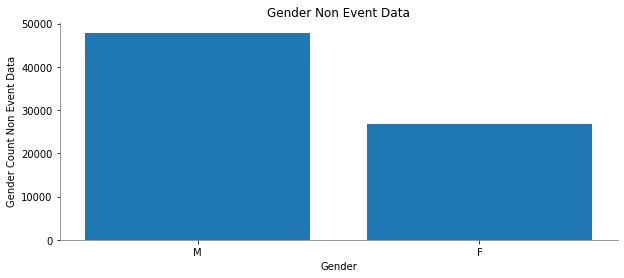

In [42]:
fig = plt.figure(figsize = (10,4))
ax = plt.axes()
plt.bar(ag_df_NE_g['index'],ag_df_NE_g['gender'])
custom_graph(ax,'Gender','Gender Count Non Event Data','Gender Non Event Data')

In [24]:
import warnings
warnings.simplefilter('ignore')

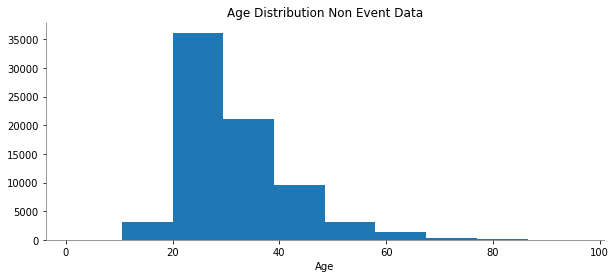

In [44]:
fig = plt.figure(figsize = (10,4))
ax = plt.axes()
plt.hist(ag_df_NE['age'])
custom_graph(ax,'Age','','Age Distribution Non Event Data')

In [41]:
ag_df_E = df_event_data.select('age','gender')

ag_df_E = ag_df_E.toPandas()

ag_df_E.head()

,age,gender
0,30,M
1,30,M
2,30,M
3,30,M
4,30,M


In [42]:
ag_df_E_g = ag_df_E['gender'].value_counts()

ag_df_E_g = ag_df_E_g.reset_index()

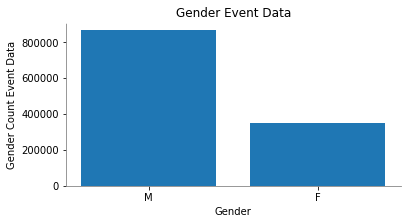

In [47]:
fig = plt.figure(figsize = (6,3))
ax = plt.axes()
plt.bar(ag_df_E_g['index'],ag_df_E_g['gender'])
custom_graph(ax,'Gender','Gender Count Event Data','Gender Event Data')

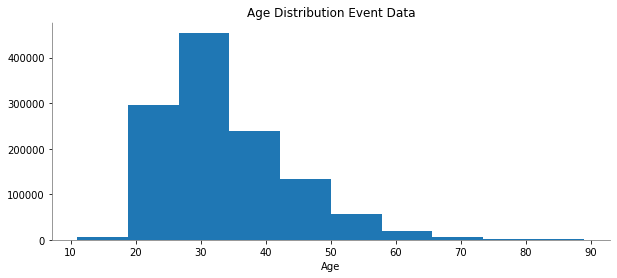

In [48]:
fig = plt.figure(figsize = (10,4))
ax = plt.axes()
plt.hist(ag_df_E['age'])
custom_graph(ax,'Age','','Age Distribution Event Data')

## Boxplot analysis for gender and age [bivariate].

In [25]:
import seaborn as sns

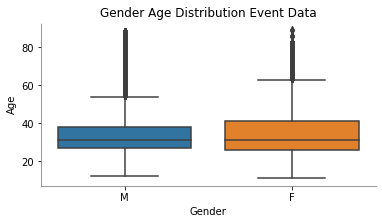

In [51]:
fig = plt.figure(figsize = (6,3))
ax = plt.axes()
sns.boxplot(ag_df_E['gender'],ag_df_E['age'])
custom_graph(ax,'Gender','Age','Gender Age Distribution Event Data')

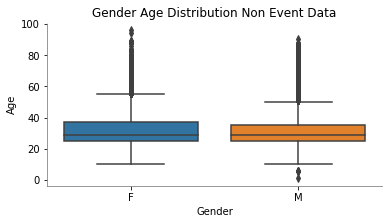

In [52]:
fig = plt.figure(figsize = (6,3))
ax = plt.axes()
sns.boxplot(ag_df_NE['gender'],ag_df_NE['age'])
custom_graph(ax,'Gender','Age','Gender Age Distribution Non Event Data')

## Plot the percentage of the device_ids with and without event data. 

In [54]:
Total_Device_Id = 74645

non_event_device_id = df_non_event_data.select('device_id').toPandas()

event_device_id = df_event_data.select('device_id').toPandas()

non_event_device_id_count = len(non_event_device_id.drop_duplicates())

event_device_id_count = len(event_device_id.drop_duplicates())

percentage_device_events = event_device_id_count/non_event_device_id_count

percentage_device_non_events = (Total_Device_Id - event_device_id_count)/non_event_device_id_count

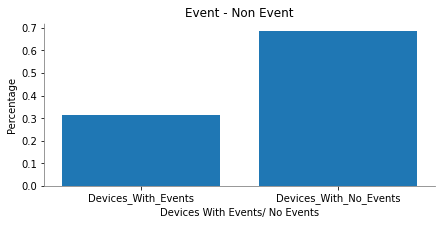

In [55]:
fig = plt.figure(figsize = (7,3))
ax = plt.axes()
plt.bar(['Devices_With_Events','Devices_With_No_Events'],[percentage_device_events,percentage_device_non_events])
custom_graph(ax,'Devices With Events/ No Events','Percentage','Event - Non Event')

## Plot a graph representing the distribution of events over different days of a week. 

In [57]:
df_event_data.printSchema()

root
 |-- device_id: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- groups: string (nullable = true)
 |-- event_id: integer (nullable = true)
 |-- time_stamp: timestamp (nullable = true)
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)



In [26]:
from pyspark.sql.functions import year, month, dayofmonth, weekofyear,dayofweek,hour,udf,mean
from pyspark.sql.types import IntegerType,BooleanType,DateType,StringType

In [27]:
df_event_data_llc = df_event_data_llc.withColumn('Month',month('time_stamp'))

df_event_data_llc = df_event_data_llc.withColumn('Year',year('time_stamp'))

df_event_data_llc = df_event_data_llc.withColumn('DayOfWeek',dayofweek('time_stamp'))

In [46]:
df_event_data_llc.show(5)

+--------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+
|           device_id|gender|age|groups|event_id|         time_stamp|longitude|latitude|Month|Year|DayOfWeek|
+--------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+
|-1001337759327040000|     M| 30|M25-32| 1040336|2016-05-04 13:59:23|   120.11|   30.29|    5|2016|        4|
|-1001337759327040000|     M| 30|M25-32| 1058003|2016-05-04 08:26:47|   120.19|    30.2|    5|2016|        4|
|-1001337759327040000|     M| 30|M25-32| 1083521|2016-05-04 08:30:06|   120.19|    30.2|    5|2016|        4|
|-1001337759327040000|     M| 30|M25-32| 1092240|2016-05-06 13:56:26|   120.19|    30.2|    5|2016|        6|
|-1001337759327040000|     M| 30|M25-32| 1114412|2016-05-04 10:04:12|    120.3|   30.41|    5|2016|        4|
+--------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+
only showi

In [28]:
from collections import Counter

In [62]:
Events_DOW = df_event_data_llc.select('DayOfWeek').toPandas()
Events_DOW_Count = Events_DOW.value_counts()

In [63]:
Events_DOW_Count = Events_DOW_Count.reset_index()
Events_DOW_Count

,DayOfWeek,0
0,3,128829
1,4,127701
2,5,127336
3,6,122111
4,2,120738
5,7,116556
6,1,116022


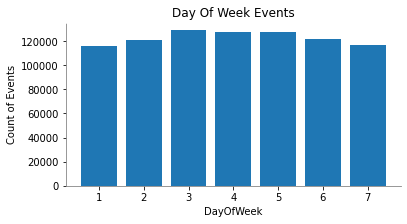

In [64]:
fig = plt.figure(figsize = (6,3))
ax = plt.axes()
plt.bar(Events_DOW_Count['DayOfWeek'],Events_DOW_Count[0])
custom_graph(ax,'DayOfWeek','Count of Events','Day Of Week Events')

## Plot a graph representing the distribution of events per hour [for one-week data].

In [29]:
df_event_data_llc = df_event_data_llc.withColumn('Week',weekofyear('time_stamp'))

In [30]:
df_event_data_llc = df_event_data_llc.withColumn('Hour',hour('time_stamp'))

In [38]:
df_event_data_llc.select('Week').show(5)

+----+
|Week|
+----+
|  18|
|  18|
|  18|
|  18|
|  18|
+----+
only showing top 5 rows



In [50]:
df_event_one_week = df_event_data_llc.filter(col('Week') == 18).select(col('Week'),col('Hour'))

df_event_one_week_ = df_event_one_week.toPandas()

df_event_one_week_.head()

,Week,Hour
0,18,13
1,18,8
2,18,8
3,18,13
4,18,10


In [70]:
hour_dist = df_event_one_week_.groupby('Hour').count()

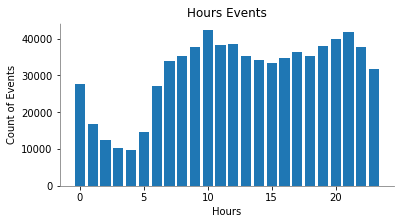

In [71]:
fig = plt.figure(figsize = (6,3))
ax = plt.axes()
plt.bar(hour_dist.index,hour_dist['Week'])
custom_graph(ax,'Hours','Count of Events','Hours Events')

## The difference in the distribution of events per hour for Male and Female consumers. [Show the difference using an appropriate chart for one-week data.]

In [51]:
df_event_one_week = df_event_data_llc.filter(col('Week') == 18).select(col('Week'),col('Hour'),col('gender'))

df_event_one_week_ = df_event_one_week.toPandas()

df_event_one_week_.head()

,Week,Hour,gender
0,18,13,M
1,18,8,M
2,18,8,M
3,18,13,M
4,18,10,M


In [52]:
df_event_one_week__ = df_event_one_week_.groupby(['gender','Hour']).count().reset_index().rename(columns = {'Week':'Count'})

In [53]:
df_event_one_week__.head()

,gender,Hour,Count
0,F,0,6308
1,F,1,4020
2,F,2,3153
3,F,3,2543
4,F,4,2815


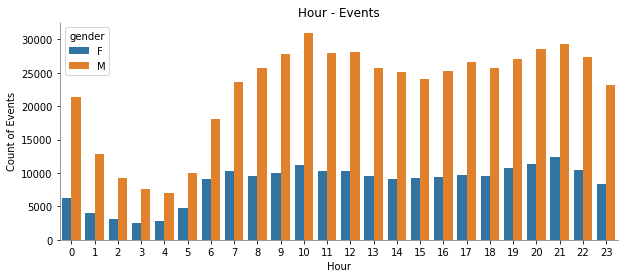

In [76]:
fig = plt.figure(figsize = (10,4))
ax = plt.axes()
sns.barplot(x=df_event_one_week__.Hour, y=df_event_one_week__.Count, hue=df_event_one_week__.gender)
custom_graph(ax,'Hour','Count of Events','Hour - Events')

## Is there any difference in the distribution of Events for different Age Groups over different days of the week? [Consider the following age groups: 0–24, 25–32, 33–45, and 46+]

In [31]:
def ageGroup(age):
    
    if age <= 24 :
        
        return '0-24'
    
    if age <=32 and age >= 25:
        
        return '25-32'
    
    if age >= 33 and age <= 45:
        
        return '33-45'
    
    if age >= 46:
        
        return '46+'
        

In [31]:
convertUDF = udf(lambda z: ageGroup(z)) 

In [55]:
df_event_data_llc_P = df_event_data_llc.toPandas()

In [56]:
df_event_data_llc_P['ageCategory'] = df_event_data_llc_P['age'].apply(lambda x : ageGroup(x))

In [57]:
df_event_data_llc_P.columns

Index(['device_id', 'gender', 'age', 'groups', 'event_id', 'time_stamp',
       'longitude', 'latitude', 'Month', 'Year', 'DayOfWeek', 'Week', 'Hour',
       'ageCategory'],
      dtype='object')

In [58]:
df_event_data_llc.printSchema()

root
 |-- device_id: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- groups: string (nullable = true)
 |-- event_id: integer (nullable = true)
 |-- time_stamp: timestamp (nullable = true)
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Week: integer (nullable = true)
 |-- Hour: integer (nullable = true)



In [59]:
group_df = df_event_data_llc_P.groupby(['gender','groups','Hour','Month','Year'])['ageCategory'].value_counts()

group_df.head()

gender  groups  Hour  Month  Year  ageCategory
F       F0-24   0     5      2016  0-24           1179
                1     5      2016  0-24            826
                2     5      2016  0-24            524
                3     5      2016  0-24            517
                4     5      2016  0-24            395
Name: ageCategory, dtype: int64

In [60]:
group_df_ = pd.DataFrame(group_df)

In [61]:
group_df_ = group_df_.rename(columns = {'ageCategory':'count'}).reset_index()

In [62]:
group_df_.head()

,gender,groups,Hour,Month,Year,ageCategory,count
0,F,F0-24,0,5,2016,0-24,1179
1,F,F0-24,1,5,2016,0-24,826
2,F,F0-24,2,5,2016,0-24,524
3,F,F0-24,3,5,2016,0-24,517
4,F,F0-24,4,5,2016,0-24,395


In [63]:
group_df_ = group_df_[['gender','ageCategory','Hour','count']].groupby(['gender','ageCategory','Hour'])['count'].mean()

group_df__ = group_df_.reset_index().rename(columns = {'count':'mean'})

group_df__.head()

,gender,ageCategory,Hour,mean
0,F,0-24,0,1179.0
1,F,0-24,1,826.0
2,F,0-24,2,524.0
3,F,0-24,3,517.0
4,F,0-24,4,395.0


In [64]:
group_df__PM = group_df__[group_df__.gender == 'M'].pivot_table(index = 'Hour',columns = 'ageCategory',values = 'mean')

In [65]:
group_df__FM = group_df__[group_df__.gender == 'F'].pivot_table(index = 'Hour',columns = 'ageCategory',values = 'mean')

In [66]:
group_df__.ageCategory.unique()

array(['0-24', '25-32', '33-45', '46+'], dtype=object)

<AxesSubplot:xlabel='Hour'>

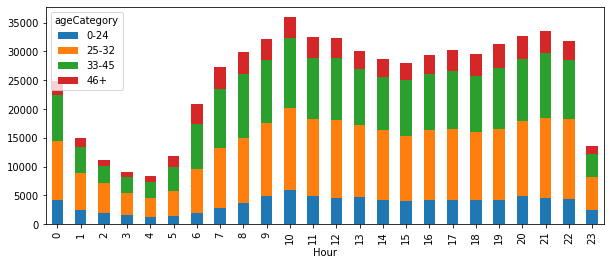

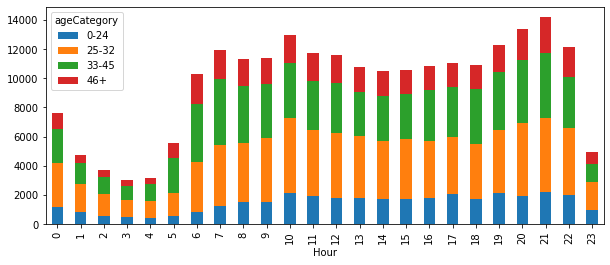

In [91]:
# fig = plt.figure(figsize = (20,4))
# ax = plt.axes()
group_df__PM.plot(kind='bar', stacked=True,figsize=(10,4))
# group_df__PM.plot(figsize=(10,4))
group_df__FM.plot(kind='bar', stacked=True,figsize=(10,4))
# group_df__PM.plot(figsize=(10,4))
# custom_graph(ax,'Hour','Count of Events','Hour - Events')

## Stacked bar chart for the top 10 mobile brands across male and female consumers.

In [92]:
df_non_event_data.show(5)

+--------------------+------+---+------+-----------+------------+
|           device_id|gender|age|groups|phone_brand|device_model|
+--------------------+------+---+------+-----------+------------+
|-1000369272589010000|     F| 26|F25-32|       vivo|        Y17T|
|-1000572055892390000|     F| 27|F25-32|       OPPO|       R819T|
|-1000643208750510000|     M| 29|M25-32|     Gionee|       GN137|
|-1001337759327040000|     M| 30|M25-32|       OPPO|         A31|
|-1001949518704260000|     M| 22| M0-24|       OPPO|          R1|
+--------------------+------+---+------+-----------+------------+
only showing top 5 rows



In [67]:
df_non_event_data_Top_Brands = df_non_event_data.groupby('phone_brand').pivot('gender').count()

In [68]:
df_non_event_data_Top_Brands.show(5)

+-----------+---+---+
|phone_brand|  F|  M|
+-----------+---+---+
|    lingyun|  6| 14|
|    hisense| 63|141|
|    bigcola|  1|  9|
|      ipair|  9| 33|
|      yougo|  6| 18|
+-----------+---+---+
only showing top 5 rows



In [69]:
df_non_event_data_Top_Brands = df_non_event_data_Top_Brands.withColumn('Total',col('F')+col('M'))

In [70]:
df_non_event_data_Top_Brands_20 = df_non_event_data_Top_Brands.sort(col('Total').desc()).limit(20)

In [71]:
df_non_event_data_Top_Brands_20_P = df_non_event_data_Top_Brands_20.toPandas()

In [72]:
df_non_event_data_Top_Brands_20_P_Per = df_non_event_data_Top_Brands_20_P.copy()

In [73]:
df_non_event_data_Top_Brands_20_P_Per['F'] = df_non_event_data_Top_Brands_20_P_Per['F']/df_non_event_data_Top_Brands_20_P_Per['Total']
df_non_event_data_Top_Brands_20_P_Per['M'] = df_non_event_data_Top_Brands_20_P_Per['M']/df_non_event_data_Top_Brands_20_P_Per['Total']

<AxesSubplot:xlabel='phone_brand'>

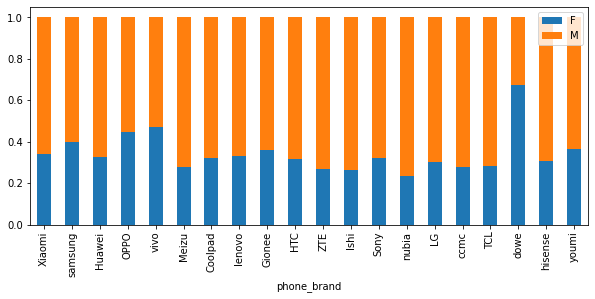

In [100]:
df_non_event_data_Top_Brands_20_P_Per[['phone_brand','F','M']].set_index('phone_brand').plot(kind='bar', stacked=True,figsize=(10,4))

<AxesSubplot:xlabel='phone_brand'>

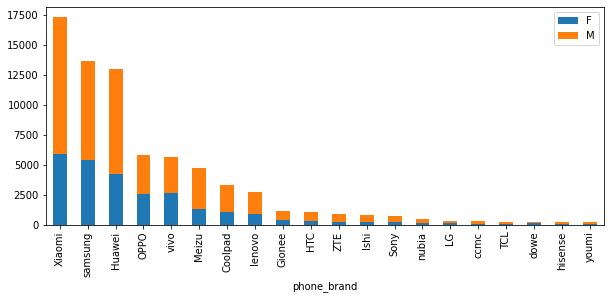

In [101]:
df_non_event_data_Top_Brands_20_P[['phone_brand','F','M']].set_index('phone_brand').plot(kind='bar', stacked=True,figsize=(10,4))

## Prepare a chart representing the ten frequently used applications and their respective male and female percentage.

In [74]:
df.show(5)

+--------+--------------------+------------+---------+--------+-------------+
|event_id|              app_id|is_installed|is_active|label_id|     category|
+--------+--------------------+------------+---------+--------+-------------+
| 1000000|-1051986413094956896|           1|        0|     787|     low risk|
| 1000000|-1234297064722937607|           1|        0|     405| custom label|
| 1000000|-1234297064722937607|           1|        0|     737|         fund|
| 1000000|-1234297064722937607|           1|        0|     738|monetary fund|
| 1000000|-1562373526021293187|           1|        0|    1007| p2p net loan|
+--------+--------------------+------------+---------+--------+-------------+
only showing top 5 rows



In [75]:
merged_events_apps = df_event_data_llc.join(df,df_event_data_llc.event_id ==  df.event_id,"inner")

In [76]:
merged_events_apps.show(5)

+-------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+----+----+--------+--------------------+------------+---------+--------+--------------------+
|          device_id|gender|age|groups|event_id|         time_stamp|longitude|latitude|Month|Year|DayOfWeek|Week|Hour|event_id|              app_id|is_installed|is_active|label_id|            category|
+-------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+----+----+--------+--------------------+------------+---------+--------+--------------------+
|4452542815713600000|     M| 29|M25-32|    4818|2016-05-01 07:43:01|   120.99|   31.37|    5|2016|        1|  17|   7|    4818|-1066222546835696818|           1|        0|     704|property industry...|
|4452542815713600000|     M| 29|M25-32|    4818|2016-05-01 07:43:01|   120.99|   31.37|    5|2016|        1|  17|   7|    4818|-1066222546835696818|           1|        0|     715|           p

In [185]:
merged_events_apps.columns

['device_id',
 'gender',
 'age',
 'groups',
 'event_id',
 'time_stamp',
 'longitude',
 'latitude',
 'Month',
 'Year',
 'DayOfWeek',
 'Week',
 'Hour',
 'event_id',
 'app_id',
 'is_installed',
 'is_active',
 'label_id',
 'category']

In [77]:
merged_events_apps_P = merged_events_apps.groupby('category').pivot('gender').count()

In [78]:
merged_events_apps_P.show(5)

+--------------------+-----+-----+
|            category|    F|    M|
+--------------------+-----+-----+
|        reality show|    1|   35|
|              travel|19359|83824|
|              poetry|  123|  396|
|cultivation fanta...|   35|  512|
|       trendy / cool| 4473| 9129|
+--------------------+-----+-----+
only showing top 5 rows



In [62]:
merged_events_apps_P_ = merged_events_apps_P.toPandas()

In [108]:
merged_events_apps_P_.fillna(0,inplace = True)

In [109]:
merged_events_apps_P_.shape

(431, 3)

In [110]:
merged_events_apps_P_.head()

,category,F,M
0,travel,6479.0,27921.0
1,reality show,0.0,17.0
2,poetry,38.0,129.0
3,cultivation fantasy game,13.0,163.0
4,trendy / cool,1494.0,3125.0


In [63]:
merged_events_apps_P_['Total'] = merged_events_apps_P_['F'] + merged_events_apps_P_['M']

In [112]:
merged_events_apps_P_.sort_values('Total',ascending = False,inplace = True)

<AxesSubplot:xlabel='category'>

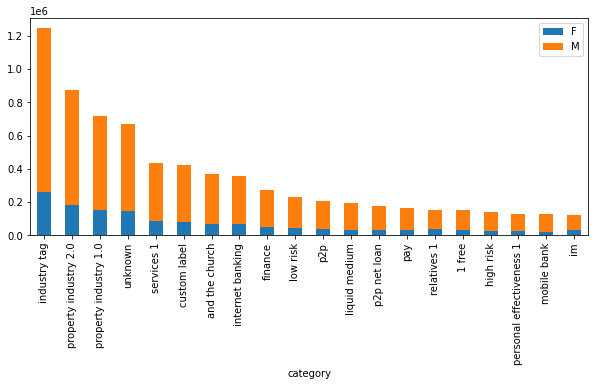

In [113]:
merged_events_apps_P_[['category','F','M']].iloc[:20].set_index('category').plot(kind='bar', stacked=True,figsize=(10,4))

## List the top 10 mobile phone brands bought by customers by age groups. [Consider the following age groups: 0–24, 25–32, 33–45, and 46+]

In [64]:
df_non_event_data.show(5)

+--------------------+------+---+------+-----------+------------+
|           device_id|gender|age|groups|phone_brand|device_model|
+--------------------+------+---+------+-----------+------------+
|-1000369272589010000|     F| 26|F25-32|       vivo|        Y17T|
|-1000572055892390000|     F| 27|F25-32|       OPPO|       R819T|
|-1000643208750510000|     M| 29|M25-32|     Gionee|       GN137|
|-1001337759327040000|     M| 30|M25-32|       OPPO|         A31|
|-1001949518704260000|     M| 22| M0-24|       OPPO|          R1|
+--------------------+------+---+------+-----------+------------+
only showing top 5 rows



In [115]:
l = [('Alice', 1)]
spark.createDataFrame(l).collect()

Py4JJavaError: An error occurred while calling o436.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 99.0 failed 1 times, most recent failure: Lost task 1.0 in stage 99.0 (TID 3421, localhost, executor driver): java.io.IOException: Cannot run program "/home/ubuntu/spark-2.4.4-bin-hadoop2.7/python": error=13, Permission denied
	at java.lang.ProcessBuilder.start(ProcessBuilder.java:1048)
	at org.apache.spark.api.python.PythonWorkerFactory.startDaemon(PythonWorkerFactory.scala:197)
	at org.apache.spark.api.python.PythonWorkerFactory.createThroughDaemon(PythonWorkerFactory.scala:122)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:95)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:117)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:109)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.io.IOException: error=13, Permission denied
	at java.lang.UNIXProcess.forkAndExec(Native Method)
	at java.lang.UNIXProcess.<init>(UNIXProcess.java:247)
	at java.lang.ProcessImpl.start(ProcessImpl.java:134)
	at java.lang.ProcessBuilder.start(ProcessBuilder.java:1029)
	... 31 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1889)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1877)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1876)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1876)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2110)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2048)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:737)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2126)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:944)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:299)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:3263)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:3260)
	at org.apache.spark.sql.Dataset$$anonfun$52.apply(Dataset.scala:3370)
	at org.apache.spark.sql.execution.SQLExecution$$anonfun$withNewExecutionId$1.apply(SQLExecution.scala:78)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:73)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3369)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:3260)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.io.IOException: Cannot run program "/home/ubuntu/spark-2.4.4-bin-hadoop2.7/python": error=13, Permission denied
	at java.lang.ProcessBuilder.start(ProcessBuilder.java:1048)
	at org.apache.spark.api.python.PythonWorkerFactory.startDaemon(PythonWorkerFactory.scala:197)
	at org.apache.spark.api.python.PythonWorkerFactory.createThroughDaemon(PythonWorkerFactory.scala:122)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:95)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:117)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:109)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: java.io.IOException: error=13, Permission denied
	at java.lang.UNIXProcess.forkAndExec(Native Method)
	at java.lang.UNIXProcess.<init>(UNIXProcess.java:247)
	at java.lang.ProcessImpl.start(ProcessImpl.java:134)
	at java.lang.ProcessBuilder.start(ProcessBuilder.java:1029)
	... 31 more


In [160]:
df_non_event_data.count()

74646

In [79]:
df_non_event_data_P = df_non_event_data.toPandas()

In [80]:
df_non_event_data_P['ageCategory'] = df_non_event_data_P['age'].apply(lambda x : ageGroup(x))

In [81]:
df_non_event_data_P_ = df_non_event_data_P.pivot_table(index = 'phone_brand',columns = 'ageCategory',values = 'device_id', aggfunc = 'count')

In [82]:
df_non_event_data_P_.fillna(0,inplace = True)

In [83]:
df_non_event_data_P_.columns

Index(['0-24', '25-32', '33-45', '46+'], dtype='object', name='ageCategory')

In [84]:
df_non_event_data_P_['Total'] = df_non_event_data_P_['0-24'] + df_non_event_data_P_['25-32'] + \
                                df_non_event_data_P_['33-45'] + df_non_event_data_P_['46+']

In [85]:
df_non_event_data_P_.sort_values('Total',ascending = False, inplace = True)

In [86]:
df_non_event_data_P_.head(10)

ageCategory,0-24,25-32,33-45,46+,Total
phone_brand,,,,,
Xiaomi,4229.0,7537.0,4000.0,1534.0,17300.0
samsung,2359.0,5555.0,4175.0,1580.0,13669.0
Huawei,2443.0,5100.0,3964.0,1453.0,12960.0
OPPO,1856.0,2367.0,1183.0,377.0,5783.0
vivo,1975.0,2317.0,1013.0,332.0,5637.0
Meizu,1684.0,2052.0,687.0,276.0,4699.0
Coolpad,808.0,1208.0,942.0,381.0,3339.0
lenovo,612.0,1005.0,738.0,336.0,2691.0
Gionee,328.0,400.0,278.0,117.0,1123.0


## Considering the events data, you can create a feature called Average Events, which can give you an estimate of how long the users' mobile phones are active.

In [175]:
df_event_data_llc.show(5)

+--------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+----+----+
|           device_id|gender|age|groups|event_id|         time_stamp|longitude|latitude|Month|Year|DayOfWeek|Week|Hour|
+--------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+----+----+
|-1001337759327040000|     M| 30|M25-32| 1040336|2016-05-04 13:59:23|   120.11|   30.29|    5|2016|        4|  18|  13|
|-1001337759327040000|     M| 30|M25-32| 1058003|2016-05-04 08:26:47|   120.19|    30.2|    5|2016|        4|  18|   8|
|-1001337759327040000|     M| 30|M25-32| 1083521|2016-05-04 08:30:06|   120.19|    30.2|    5|2016|        4|  18|   8|
|-1001337759327040000|     M| 30|M25-32| 1092240|2016-05-06 13:56:26|   120.19|    30.2|    5|2016|        6|  18|  13|
|-1001337759327040000|     M| 30|M25-32| 1114412|2016-05-04 10:04:12|    120.3|   30.41|    5|2016|        4|  18|  10|
+--------------------+------+---+------+

In [202]:
df_event_data_llc.groupby('Year').count().show()

+----+------+
|Year| count|
+----+------+
|2016|859293|
+----+------+



In [203]:
df_event_data_llc.groupby('Month').count().show()

+-----+------+
|Month| count|
+-----+------+
|    5|858992|
|    4|   301|
+-----+------+



In [204]:
df_event_data_llc.groupby('Hour').count().show()

+----+-----+
|Hour|count|
+----+-----+
|  12|44007|
|  22|43917|
|   1|19673|
|  13|40770|
|  16|40298|
|   6|31106|
|   3|12092|
|  20|46135|
|   5|17367|
|  19|43525|
|  15|38556|
|   9|43527|
|  17|41240|
|   4|11539|
|   8|41324|
|  23|37165|
|   7|39299|
|  10|48948|
|  21|47689|
|  11|44189|
+----+-----+
only showing top 20 rows



In [205]:
df_event_data_llc.groupby('DayOfWeek').count().show()

+---------+------+
|DayOfWeek| count|
+---------+------+
|        1|116022|
|        6|122111|
|        3|128829|
|        5|127336|
|        4|127701|
|        7|116556|
|        2|120738|
+---------+------+



In [206]:
df_event_data_llc.groupby('Week').count().show()

+----+------+
|Week| count|
+----+------+
|  17|116322|
|  18|742971|
+----+------+



In [235]:
df_event_data_llc.filter((col('device_id') == '-1010684607686270000') &(col('event_id') == '1015029')) .show()

+--------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+----+----+
|           device_id|gender|age|groups|event_id|         time_stamp|longitude|latitude|Month|Year|DayOfWeek|Week|Hour|
+--------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+----+----+
|-1010684607686270000|     F| 44|  F32+| 1015029|2016-05-06 14:40:43|   107.01|   33.04|    5|2016|        6|  18|  14|
+--------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+----+----+



In [234]:
df_event_data_llc.filter(col('device_id') == '-1010684607686270000').count()

257

In [236]:
df_event_data_llc.groupby(col('device_id'),col('event_id')).count().show()

+--------------------+--------+-----+
|           device_id|event_id|count|
+--------------------+--------+-----+
|-1010684607686270000| 1580910|    1|
|-1010684607686270000| 2754180|    1|
|-1021642161927890000|  120900|    1|
|-1023828320908550000| 3099767|    1|
|-1034442578068170000| 1268301|    1|
| -103454141050554000| 1214649|    1|
|-1050302093212240000| 2384247|    1|
|-1050302093212240000| 2544074|    1|
|-1050302093212240000|  761814|    1|
|-1051075383831800000| 2682321|    1|
|-1053657946037910000| 2678901|    1|
|-1055765928777350000| 1171050|    1|
|-1055765928777350000|  513034|    1|
|-1065553319625940000| 2872403|    1|
|-1068425135128090000|  988606|    1|
|-1079996304583520000| 1078361|    1|
|-1079996304583520000| 1301659|    1|
|-1079996304583520000|  783409|    1|
|-1084174363886130000| 1463083|    1|
|-1084174363886130000| 1488131|    1|
+--------------------+--------+-----+
only showing top 20 rows



In [32]:
df_event_data_min_TS = df_event_data_llc.groupby(col('device_id'),col('Month'),col('Year'),col('DayOfWeek'),col('Week'))\
                    .agg({'time_stamp':'min'})

In [33]:
df_event_data_min_TS = df_event_data_min_TS.withColumnRenamed('min(time_stamp)','Min_TS')

In [34]:
df_event_data_max_TS = df_event_data_llc.groupby(col('device_id'),col('Month'),col('Year'),col('DayOfWeek'),col('Week'))\
                    .agg({'time_stamp':'max'})

In [35]:
df_event_data_max_TS = df_event_data_max_TS.withColumnRenamed('max(time_stamp)','Max_TS')

In [91]:
df_event_data_min_TS.show(5)

+--------------------+-----+----+---------+----+-------------------+
|           device_id|Month|Year|DayOfWeek|Week|             Min_TS|
+--------------------+-----+----+---------+----+-------------------+
|-1074187698069370000|    5|2016|        5|  18|2016-05-05 08:55:06|
|-1093883751871330000|    5|2016|        5|  18|2016-05-05 04:47:16|
|-1115238687106060000|    5|2016|        4|  18|2016-05-04 08:03:42|
|-1202747965393860000|    5|2016|        5|  18|2016-05-05 00:45:06|
| -131427524715398000|    5|2016|        1|  17|2016-05-01 06:41:00|
+--------------------+-----+----+---------+----+-------------------+
only showing top 5 rows



In [121]:
df_event_data_max_TS.show(5)

+--------------------+-----+----+---------+----+-------------------+
|           device_id|Month|Year|DayOfWeek|Week|             Max_TS|
+--------------------+-----+----+---------+----+-------------------+
|-1074187698069370000|    5|2016|        5|  18|2016-05-05 10:58:55|
|-1093883751871330000|    5|2016|        5|  18|2016-05-05 04:52:18|
|-1115238687106060000|    5|2016|        4|  18|2016-05-04 17:49:02|
|-1202747965393860000|    5|2016|        5|  18|2016-05-05 22:54:50|
| -131427524715398000|    5|2016|        1|  17|2016-05-01 18:56:42|
+--------------------+-----+----+---------+----+-------------------+
only showing top 5 rows



In [36]:
df_event_data_TS = df_event_data_max_TS.join(df_event_data_min_TS,['device_id','Month','Year','DayOfWeek','Week'],\
                                             
                                             "inner" )

In [93]:
df_event_data_TS.count()

43830

In [94]:
df_event_data_TS.show(5)

+--------------------+-----+----+---------+----+-------------------+-------------------+
|           device_id|Month|Year|DayOfWeek|Week|             Max_TS|             Min_TS|
+--------------------+-----+----+---------+----+-------------------+-------------------+
|-9161106488982200000|    5|2016|        6|  18|2016-05-06 11:26:18|2016-05-06 01:40:31|
|-9139757358587510000|    5|2016|        6|  18|2016-05-06 11:31:31|2016-05-06 10:35:09|
|-9080896288558470000|    5|2016|        6|  18|2016-05-06 20:00:03|2016-05-06 19:55:47|
|-8878683891449900000|    5|2016|        4|  18|2016-05-04 22:45:58|2016-05-04 00:26:03|
|-8658253277334370000|    5|2016|        6|  18|2016-05-06 22:32:46|2016-05-06 07:16:54|
+--------------------+-----+----+---------+----+-------------------+-------------------+
only showing top 5 rows



In [95]:
df_event_data_TS.printSchema()

root
 |-- device_id: long (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Week: integer (nullable = true)
 |-- Max_TS: timestamp (nullable = true)
 |-- Min_TS: timestamp (nullable = true)



In [37]:
from pyspark.sql.functions import *

In [38]:
df_event_data_TS = df_event_data_TS.withColumn('Diff_TS',(col('Max_TS').cast('long') - col('Min_TS').cast('long'))/60)

In [39]:
df_event_data_TS.printSchema()

root
 |-- device_id: long (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Week: integer (nullable = true)
 |-- Max_TS: timestamp (nullable = true)
 |-- Min_TS: timestamp (nullable = true)
 |-- Diff_TS: double (nullable = true)



In [40]:
df_event_data_TS_ = df_event_data_TS.select(col('device_id'),col('Diff_TS'))

In [40]:
df_event_data_TS_.show(5)

+--------------------+------------------+
|           device_id|           Diff_TS|
+--------------------+------------------+
|-9161106488982200000| 585.7833333333333|
|-9139757358587510000| 56.36666666666667|
|-9080896288558470000| 4.266666666666667|
|-8878683891449900000|1339.9166666666667|
|-8658253277334370000| 915.8666666666667|
+--------------------+------------------+
only showing top 5 rows



In [41]:
df_event_data_TS_.select('Diff_TS').distinct().show()

+------------------+
|           Diff_TS|
+------------------+
| 574.8833333333333|
|203.88333333333333|
| 804.4833333333333|
|              49.8|
|            611.55|
| 7.533333333333333|
|1282.1166666666666|
| 790.4666666666667|
|26.733333333333334|
|             845.1|
| 449.6166666666667|
| 5.583333333333333|
|             330.4|
|1338.8166666666666|
| 426.3333333333333|
| 895.0833333333334|
|1298.0666666666666|
|             10.65|
| 7.866666666666666|
|              74.5|
+------------------+
only showing top 20 rows



In [41]:
df_event_data_TS_Avg = df_event_data_TS_.groupby('device_id').mean('Diff_TS')

In [42]:
df_event_data_TS_Avg = df_event_data_TS_Avg.withColumnRenamed('Diff_TS','Average_Time_Spend_In_Mins')

In [103]:
df_event_data_TS_Avg.show(5)

+--------------------+------------------+
|           device_id|      avg(Diff_TS)|
+--------------------+------------------+
| 3430877468221560000|4.8738095238095225|
| 3945679784298730000| 5.258333333333333|
| 3026827520794770000| 38.05714285714286|
|-9101962973644730000| 57.25277777777777|
|-7028335720584770000| 462.0466666666666|
+--------------------+------------------+
only showing top 5 rows



In [43]:
df_event_data_llc_with_Avg_TS = df_event_data_llc.join(df_event_data_TS_Avg,['device_id'],'inner')

In [105]:
df_event_data_llc_with_Avg_TS.show(5)

+--------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+----+----+-----------------+
|           device_id|gender|age|groups|event_id|         time_stamp|longitude|latitude|Month|Year|DayOfWeek|Week|Hour|     avg(Diff_TS)|
+--------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+----+----+-----------------+
|-9156769850272230000|     M| 31|M25-32| 1018725|2016-05-02 18:29:44|   113.86|   22.61|    5|2016|        2|  18|  18|99.24444444444445|
|-9156769850272230000|     M| 31|M25-32| 1097107|2016-05-02 18:31:27|   113.85|   22.62|    5|2016|        2|  18|  18|99.24444444444445|
|-9156769850272230000|     M| 31|M25-32| 1190755|2016-05-04 23:17:15|   113.84|   22.63|    5|2016|        4|  18|  23|99.24444444444445|
|-9156769850272230000|     M| 31|M25-32| 1190756|2016-05-04 23:13:45|   113.84|   22.63|    5|2016|        4|  18|  23|99.24444444444445|
|-9156769850272230000|     M| 31|M

## You can use the information related to the location of the users (latitude and longitude data) to create features representing changes in the latitude and longitude details at different times of the day.

In [44]:
from pyspark.sql.window import Window
import pyspark.sql.functions as func
from pyspark.sql.functions import lit

# df_event_data_llc_with_Avg_TS = df_event_data_llc_with_Avg_TS.withColumn('user', lit('tmoore'))

df_event_data_llc_with_Avg_TS_lag = df_event_data_llc_with_Avg_TS.withColumn('prev_Latitude',
                        func.lag(df_event_data_llc_with_Avg_TS['latitude'])
                                 .over(Window.partitionBy("device_id").orderBy('time_stamp')))
df_event_data_llc_with_Avg_TS_lag = df_event_data_llc_with_Avg_TS_lag.withColumn('prev_Longitude',
                        func.lag(df_event_data_llc_with_Avg_TS['longitude'])
                                 .over(Window.partitionBy("device_id").orderBy('time_stamp')))

In [107]:
df_event_data_llc_with_Avg_TS_lag.show(5)

+--------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+----+----+-----------------+-------------+--------------+
|           device_id|gender|age|groups|event_id|         time_stamp|longitude|latitude|Month|Year|DayOfWeek|Week|Hour|     avg(Diff_TS)|prev_Latitude|prev_Longitude|
+--------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+----+----+-----------------+-------------+--------------+
|-9156769850272230000|     M| 31|M25-32| 1018725|2016-05-02 18:29:44|   113.86|   22.61|    5|2016|        2|  18|  18|99.24444444444445|         null|          null|
|-9156769850272230000|     M| 31|M25-32|  881242|2016-05-02 18:30:14|   113.86|   22.61|    5|2016|        2|  18|  18|99.24444444444445|        22.61|        113.86|
|-9156769850272230000|     M| 31|M25-32| 1457944|2016-05-02 18:30:44|   113.85|   22.62|    5|2016|        2|  18|  18|99.24444444444445|        22.61|        113.86

In [45]:
from pyspark.sql.functions import coalesce

In [46]:
df_event_data_llc_with_Avg_TS_lag = df_event_data_llc_with_Avg_TS_lag.\
                                    withColumn("prev_Latitude",\
                                               coalesce(df_event_data_llc_with_Avg_TS_lag.prev_Latitude,\
                                                        df_event_data_llc_with_Avg_TS_lag.latitude))

In [47]:
df_event_data_llc_with_Avg_TS_lag = df_event_data_llc_with_Avg_TS_lag.\
                                    withColumn("prev_Longitude",\
                                               coalesce(df_event_data_llc_with_Avg_TS_lag.prev_Longitude,\
                                                        df_event_data_llc_with_Avg_TS_lag.longitude))

In [111]:
df_event_data_llc_with_Avg_TS_lag.show(5)

+--------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+----+----+-----------------+-------------+--------------+
|           device_id|gender|age|groups|event_id|         time_stamp|longitude|latitude|Month|Year|DayOfWeek|Week|Hour|     avg(Diff_TS)|prev_Latitude|prev_Longitude|
+--------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+----+----+-----------------+-------------+--------------+
|-9156769850272230000|     M| 31|M25-32| 1018725|2016-05-02 18:29:44|   113.86|   22.61|    5|2016|        2|  18|  18|99.24444444444445|        22.61|        113.86|
|-9156769850272230000|     M| 31|M25-32|  881242|2016-05-02 18:30:14|   113.86|   22.61|    5|2016|        2|  18|  18|99.24444444444445|        22.61|        113.86|
|-9156769850272230000|     M| 31|M25-32| 1457944|2016-05-02 18:30:44|   113.85|   22.62|    5|2016|        2|  18|  18|99.24444444444445|        22.61|        113.86

In [143]:
df_event_data_llc_with_Avg_TS_lag.select(col('latitude'),col('prev_Latitude')).distinct().show()

+--------+-------------+
|latitude|prev_Latitude|
+--------+-------------+
|   31.15|        31.16|
|   34.67|        34.68|
|   34.79|        34.79|
|   22.58|        22.57|
|   32.53|        32.53|
|   30.65|        30.66|
|   23.01|        22.99|
|   24.51|        24.51|
|   31.23|        31.25|
|   39.83|        39.83|
|   30.77|        30.81|
|   39.18|        39.12|
|   33.44|        33.44|
|   31.67|        31.68|
|   29.34|        29.38|
|   32.46|        32.46|
|   24.06|        24.06|
|   46.88|        46.88|
|   32.09|        32.31|
|   23.26|        23.35|
+--------+-------------+
only showing top 20 rows



In [48]:
df_event_data_llc_with_Avg_TS_lag_ = df_event_data_llc_with_Avg_TS_lag.withColumn('Change_in_LL',\
                                                                                (col('latitude') == col('prev_Latitude')) & (col('longitude') == col('prev_Longitude')))

In [113]:
df_event_data_llc_with_Avg_TS_lag_.show(5)

+--------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+----+----+-----------------+-------------+--------------+------------+
|           device_id|gender|age|groups|event_id|         time_stamp|longitude|latitude|Month|Year|DayOfWeek|Week|Hour|     avg(Diff_TS)|prev_Latitude|prev_Longitude|Change_in_LL|
+--------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+----+----+-----------------+-------------+--------------+------------+
|-9156769850272230000|     M| 31|M25-32| 1018725|2016-05-02 18:29:44|   113.86|   22.61|    5|2016|        2|  18|  18|99.24444444444445|        22.61|        113.86|        true|
|-9156769850272230000|     M| 31|M25-32|  881242|2016-05-02 18:30:14|   113.86|   22.61|    5|2016|        2|  18|  18|99.24444444444445|        22.61|        113.86|        true|
|-9156769850272230000|     M| 31|M25-32| 1457944|2016-05-02 18:30:44|   113.85|   22.62|    5|2016| 

In [146]:
df_event_data_llc_with_Avg_TS_lag_.groupby('Change_in_LL').count().show()

+------------+------+
|Change_in_LL| count|
+------------+------+
|        true|774461|
|       false| 84832|
+------------+------+



## You can create features such as Median Latitude and Median Longitude for different event ids.

In [49]:
import pyspark.sql.functions as F

df_event_data_llc_with_Avg_TS_lat_median = df_event_data_llc_with_Avg_TS_lag_.groupby('device_id','event_id').agg(F.expr('percentile(latitude, array(0.50))')[0].alias('lat_med'),F.expr('percentile(longitude, array(0.50))')[0].alias('lon_med'))

In [177]:
df_event_data_llc_with_Avg_TS_lat_median.show(5)

+--------------------+--------+-------+-------+
|           device_id|event_id|lat_med|lon_med|
+--------------------+--------+-------+-------+
|-9156769850272230000|   20211|  22.63| 113.84|
|-9156769850272230000|   58692|  22.63| 113.84|
|-9156769850272230000|  119260|  22.63| 113.84|
|-9156769850272230000|  244659|  22.63| 113.84|
|-9156769850272230000|  323747|  22.63| 113.84|
+--------------------+--------+-------+-------+
only showing top 5 rows



In [167]:
df_event_data_llc_with_Avg_TS_lat_median.columns

['device_id', 'event_id', 'lat_med', 'lon_med']

In [151]:
df_event_data_llc_with_Avg_TS_lag_.approxQuantile("latitude", [0.5], 0.25)

[41.93]

In [171]:
df_event_data_llc_with_Avg_TS_lag_.show(5)

+--------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+----+----+-----------------+-------------+--------------+------------+
|           device_id|gender|age|groups|event_id|         time_stamp|longitude|latitude|Month|Year|DayOfWeek|Week|Hour|     avg(Diff_TS)|prev_Latitude|prev_Longitude|Change_in_LL|
+--------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+----+----+-----------------+-------------+--------------+------------+
|-9156769850272230000|     M| 31|M25-32| 1018725|2016-05-02 18:29:44|   113.86|   22.61|    5|2016|        2|  18|  18|99.24444444444445|        22.61|        113.86|        true|
|-9156769850272230000|     M| 31|M25-32|  881242|2016-05-02 18:30:14|   113.86|   22.61|    5|2016|        2|  18|  18|99.24444444444445|        22.61|        113.86|        true|
|-9156769850272230000|     M| 31|M25-32| 1457944|2016-05-02 18:30:44|   113.85|   22.62|    5|2016| 

In [153]:
print(df_event_data_llc_with_Avg_TS_lag_.columns)

['device_id', 'gender', 'age', 'groups', 'event_id', 'time_stamp', 'longitude', 'latitude', 'Month', 'Year', 'DayOfWeek', 'Week', 'Hour', 'avg(Diff_TS)', 'prev_Latitude', 'prev_Longitude', 'Change_in_LL']


In [181]:
df_event_data_llc_with_Avg_TS_lag_.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in ['device_id','event_id','longitude','latitude']]).show()

+---------+--------+---------+--------+
|device_id|event_id|longitude|latitude|
+---------+--------+---------+--------+
|        0|       0|        0|       0|
+---------+--------+---------+--------+



In [180]:
df_event_data_llc_with_Avg_TS_lat_median.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_event_data_llc_with_Avg_TS_lat_median.columns]).show()

+---------+--------+-------+-------+
|device_id|event_id|lat_med|lon_med|
+---------+--------+-------+-------+
|        0|       0|      0|      0|
+---------+--------+-------+-------+



In [50]:
df_event_data_llc_with_Avg_TS_lat_median_ = df_event_data_llc_with_Avg_TS_lat_median\
                                                .select(col('lat_med'),col('lon_med'),col("event_id").alias("eid")\
                                                        ,col("device_id").alias("did"))

In [116]:
df_event_data_llc_with_Avg_TS_lat_median_.show(5)

+-------+-------+------+--------------------+
|lat_med|lon_med|   eid|                 did|
+-------+-------+------+--------------------+
|  22.63| 113.84| 20211|-9156769850272230000|
|  22.63| 113.84| 58692|-9156769850272230000|
|  22.63| 113.84|119260|-9156769850272230000|
|  22.63| 113.84|244659|-9156769850272230000|
|  22.63| 113.84|323747|-9156769850272230000|
+-------+-------+------+--------------------+
only showing top 5 rows



In [51]:
df_event_data_llc_with_Avg_TS_lag_med = df_event_data_llc_with_Avg_TS_lat_median_ \
                            .join(df_event_data_llc_with_Avg_TS_lag_,\
                            (df_event_data_llc_with_Avg_TS_lat_median_.did == df_event_data_llc_with_Avg_TS_lag_.device_id)&\
                            (df_event_data_llc_with_Avg_TS_lat_median_.eid == df_event_data_llc_with_Avg_TS_lag_.event_id),\
                                  'inner')

In [118]:
df_event_data_llc_with_Avg_TS_lag_med.show(5)

+-------+-------+-------+--------------------+--------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+----+----+-----------------+-------------+--------------+------------+
|lat_med|lon_med|    eid|                 did|           device_id|gender|age|groups|event_id|         time_stamp|longitude|latitude|Month|Year|DayOfWeek|Week|Hour|     avg(Diff_TS)|prev_Latitude|prev_Longitude|Change_in_LL|
+-------+-------+-------+--------------------+--------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+----+----+-----------------+-------------+--------------+------------+
|  23.19| 113.24|2728961|-9222956879900150000|-9222956879900150000|     M| 36|  M32+| 2728961|2016-05-07 14:22:50|   113.24|   23.19|    5|2016|        7|  18|  14|           677.55|        23.19|        113.24|        true|
|  30.87| 114.36| 340913|-9221026417907250000|-9221026417907250000|     F| 31|F25-32|  340913|2016-0

## You can also group the existing categories to create a new supercategory that will establish a significance in predicting the outcome variable.

In [195]:
df.show(5)

+--------+--------------------+------------+---------+--------+-------------+
|event_id|              app_id|is_installed|is_active|label_id|     category|
+--------+--------------------+------------+---------+--------+-------------+
| 1000000|-1051986413094956896|           1|        0|     787|     low risk|
| 1000000|-1234297064722937607|           1|        0|     405| custom label|
| 1000000|-1234297064722937607|           1|        0|     737|         fund|
| 1000000|-1234297064722937607|           1|        0|     738|monetary fund|
| 1000000|-1562373526021293187|           1|        0|    1007| p2p net loan|
+--------+--------------------+------------+---------+--------+-------------+
only showing top 5 rows



## Plot the visualisation plot for a sample of 1 lakh data points.

In [52]:
df_event_data_1lac = df_event_data_llc_with_Avg_TS_lag_med.\
                        filter(((col('longitude') != -1)&(col('longitude') != 1))&((col('latitude') != -1)|(col('latitude') != 1))).select(col('longitude'),col('latitude')).limit(100000).groupby(col('longitude'),col('latitude')).count()

df_event_data_1lacP = df_event_data_1lac.toPandas()

df_event_data_1lacP.sort_values('count',ascending = False)

,longitude,latitude,count
17,104.00,30.00,1357
128,111.92,34.74,449
738,123.47,41.82,321
472,111.21,27.85,302
1964,114.26,30.57,292
2442,115.02,38.03,290
2398,112.56,33.00,269
2590,114.11,22.54,242
2163,114.47,38.03,242
64,118.81,32.11,232


In [120]:
df_event_data_1lacP[df_event_data_1lacP.longitude == 1]

,longitude,latitude,count


In [121]:
df_event_data_1lac.show()

+---------+--------+-----+
|longitude|latitude|count|
+---------+--------+-----+
|   113.24|   23.19|    7|
|   114.36|   30.87|   12|
|   113.71|    34.7|   18|
|    113.8|   22.73|   31|
|   114.06|   22.53|    7|
|   116.59|   35.43|   29|
|   104.21|   30.58|   37|
|   106.56|   29.63|    1|
|   118.18|   26.64|   27|
|   112.58|   31.19|    2|
|   119.25|   26.05|   34|
|   118.43|   26.11|    1|
|   119.93|   31.78|   63|
|   119.95|   31.79|   26|
|   119.93|   31.77|   43|
|   118.99|   25.21|   18|
|   121.66|   31.14|    8|
|    104.0|    30.0| 1357|
|    119.9|   40.01|    5|
|    120.5|   31.16|    7|
+---------+--------+-----+
only showing top 20 rows



In [53]:
from mpl_toolkits.basemap import Basemap
%matplotlib inline

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

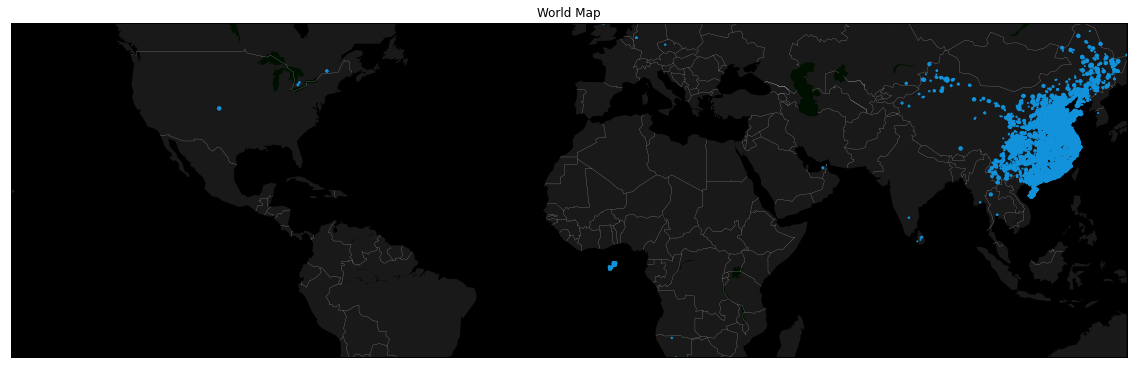

In [123]:
fig = plt.figure(figsize=(20, 20))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=df_event_data_1lacP["latitude"].min(),  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=df_event_data_1lacP["latitude"].max(), #latitude of upper right hand corner of the desired map domain
             llcrnrlon=df_event_data_1lacP["longitude"].min(), #longitude of lower left hand corner of the desired map domain
             urcrnrlon=df_event_data_1lacP["longitude"].max(), #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#001000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
mxy = m(df_event_data_1lacP["longitude"].tolist(), df_event_data_1lacP["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=[12 if x >10 else x for x in df_event_data_1lacP['count']], c="#1292db", zorder=2)    # zorder for the points  

plt.title("World Map")
plt.show()

In [124]:
cat_P = df.select('category').distinct().toPandas()

In [125]:
df.select('app_id').distinct().count()

19237

In [126]:
cat_P['CategoryB'] = cat_P['category'].apply(lambda x :x[:x.find('-')].strip().lower() if x.find('-') > -1 else x.strip().lower())

In [127]:
cat_P['CategoryB'] = cat_P['CategoryB'].apply(lambda x :'game' if x.find('game') > -1 else x.strip().lower())
cat_P['CategoryB'] = cat_P['CategoryB'].apply(lambda x :'travel' if x.find('travel') > -1 else x.strip().lower())
cat_P['CategoryB'] = cat_P['CategoryB'].apply(lambda x :'trendy' if x.find('trendy') > -1 else x.strip().lower())
cat_P['CategoryB'] = cat_P['CategoryB'].apply(lambda x :'news' if x.find('news') > -1 else x.strip().lower())
cat_P['CategoryB'] = cat_P['CategoryB'].apply(lambda x :'finance' if x.find('finance') > -1 else x.strip().lower())
cat_P['CategoryB'] = cat_P['CategoryB'].apply(lambda x :'loan' if x.find('loan') > -1 else x.strip().lower())
cat_P['CategoryB'] = cat_P['CategoryB'].apply(lambda x :'science_technology' if x.find('science') > -1 & x.find('technology') > -1 else x.strip().lower())
cat_P['CategoryB'] = cat_P['CategoryB'].apply(lambda x :'comic' if x.find('comic') > -1 else x.strip().lower())
cat_P['CategoryB'] = cat_P['CategoryB'].apply(lambda x :'airlines' if x.find('airlines') > -1 else x.strip().lower())
cat_P['CategoryB'] = cat_P['CategoryB'].apply(lambda x :'mythology' if x.find('mythology') > -1 else x.strip().lower())
cat_P['CategoryB'] = cat_P['CategoryB'].apply(lambda x :'books' if x.find('books') > -1 else x.strip().lower())
cat_P['CategoryB'] = cat_P['CategoryB'].apply(lambda x :'bank' if x.find('bank') > -1 else x.strip().lower())
cat_P['CategoryB'] = cat_P['CategoryB'].apply(lambda x :'tourism' if x.find('tourism') > -1 else x.strip().lower())
cat_P['CategoryB'] = cat_P['CategoryB'].apply(lambda x :'income' if x.find('income') > -1 else x.strip().lower())
cat_P['CategoryB'] = cat_P['CategoryB'].apply(lambda x :'finance' if x.find('financ') > -1 else x.strip().lower())

In [128]:
cat_P['CategoryB'] = cat_P['CategoryB'].apply(lambda x :'insurance' if x.find('insurance') > -1 else x.strip().lower())

In [129]:
cat_P['CategoryB'] = cat_P['CategoryB'].apply(lambda x :'animation' if x.find('animation') > -1 else x.strip().lower())

In [130]:
len(cat_P['CategoryB'].unique())

324

In [131]:
cat_PT = pd.DataFrame(cat_P['CategoryB'].value_counts())

In [132]:
cat_PT['CategoryB'].sum()

453

In [133]:
cat_P

,category,CategoryB
0,travel,travel
1,poetry,poetry
2,cultivation fantasy game,game
3,reality show,reality show
4,trendy / cool,trendy
...,...,...
448,tourism product,tourism
449,billards,billards
450,game-parkour,game
451,turn based rpg game,game


In [134]:
cat_L = np.array(cat_P.CategoryB.unique()).reshape(1,-1)

In [135]:
print(sorted(cat_L))

[array(['travel', 'poetry', 'game', 'reality show', 'trendy',
       'pictures photography', 'map', 'farm', 'condition of the vehicles',
       '1 vitality', 'news', 'chinese painting', 'animation',
       'booking channels', 'magazine and journal', 'app store', 'finance',
       'low profitability', 'utilities', 'management', 'stock',
       'behalf of the drive', 'families with babies',
       'desktop enhancements', 'astrology horoscope',
       'personal effectiveness', 'buy', 'airline type', 'books',
       'world of warcraft', 'mmo', 'shushan', 'smart appliances',
       'majiang', 'traditional securities brokerage',
       'online shopping by group', 'weibo', 'casual puzzle categories',
       'estate', 'show', 'loan', 'third party payment',
       'professional skills', 'business simulation', 'insurance', 'phone',
       'hotels', 'flight area', 'securities', 'bank', 'high flow',
       'comic', 'racing (rac)', 'calendar', 'community',
       'takeaway ordering', 'reputation', 

In [136]:
merged_events_apps_1 = merged_events_apps.filter((col('longitude') == 1.0)&(col('latitude') == 1.0)).groupby('category').count().sort(col('count').desc())

In [137]:
merged_events_apps_1.show(5)

+--------------------+------+
|            category| count|
+--------------------+------+
|        industry tag|113607|
|property industry...| 76147|
|property industry...| 63678|
|             unknown| 54878|
|        custom label| 39745|
+--------------------+------+
only showing top 5 rows



## Compare the event visualisation plots based on the users' gender information. [This can be done on the sample of 1 lakh data points.]

In [138]:
df_event_data_llc_with_Avg_TS_lag_med.show(5)

+-------+-------+-------+--------------------+--------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+----+----+-----------------+-------------+--------------+------------+
|lat_med|lon_med|    eid|                 did|           device_id|gender|age|groups|event_id|         time_stamp|longitude|latitude|Month|Year|DayOfWeek|Week|Hour|     avg(Diff_TS)|prev_Latitude|prev_Longitude|Change_in_LL|
+-------+-------+-------+--------------------+--------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+----+----+-----------------+-------------+--------------+------------+
|  23.19| 113.24|2728961|-9222956879900150000|-9222956879900150000|     M| 36|  M32+| 2728961|2016-05-07 14:22:50|   113.24|   23.19|    5|2016|        7|  18|  14|           677.55|        23.19|        113.24|        true|
|  30.87| 114.36| 340913|-9221026417907250000|-9221026417907250000|     F| 31|F25-32|  340913|2016-0

In [139]:
df_event_data_1lac_ = df_event_data_llc_with_Avg_TS_lag_med.filter(((col('longitude') != -1)&(col('longitude') != 1))&((col('latitude') != -1)|(col('latitude') != 1))).select(col('longitude'),col('latitude'),col('gender')).limit(100000).groupby(col('longitude'),col('latitude'),col('gender')).count()

df_event_data_1lacP_= df_event_data_1lac_.toPandas()

df_event_data_1lacP_.sort_values('count',ascending = False)

,longitude,latitude,gender,count
111,104.00,30.00,M,1098
129,111.92,34.74,M,449
823,123.47,41.82,M,321
488,111.21,27.85,M,302
3246,115.02,38.03,F,290
...,...,...,...,...
12867,119.40,43.97,M,1
12866,116.08,39.94,M,1
5409,115.72,39.23,F,1
12864,119.97,35.88,F,1


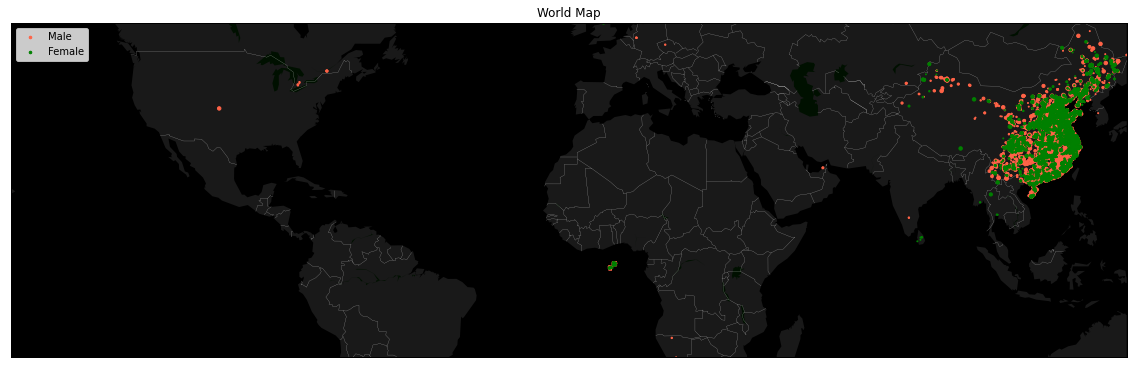

In [140]:
fig = plt.figure(figsize=(20, 20))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=df_event_data_1lacP_["latitude"].min(),  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=df_event_data_1lacP_["latitude"].max(), #latitude of upper right hand corner of the desired map domain
             llcrnrlon=df_event_data_1lacP_["longitude"].min(), #longitude of lower left hand corner of the desired map domain
             urcrnrlon=df_event_data_1lacP_["longitude"].max(), #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#001000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

M_ = df_event_data_1lacP_[df_event_data_1lacP_.gender == 'M']
F_ = df_event_data_1lacP_[df_event_data_1lacP_.gender == 'F']

# Plot the data
mxy = m(M_["longitude"].tolist(), M_["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=[12 if x >10 else x for x in M_['count']], 
          c='tomato', zorder=2, label = 'Male')    # zorder for the points  

mxy = m(F_["longitude"].tolist(), F_["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=[12 if x >10 else x for x in F_['count']], 
          c='green', zorder=2, label = 'Female')    # zorder for the points  
plt.legend()
plt.title("World Map")
plt.show()

## Compare the event visualisation plots based on the following age groups:

### 0–24 

### 25–32

### 32+

In [141]:
df_event_data_llc_with_Avg_TS_lag_med.count()

859293

In [142]:
df_event_data_1lac_ = df_event_data_llc_with_Avg_TS_lag_med.filter(((col('longitude') != -1)&(col('longitude') != 1))&((col('latitude') != -1)&(col('latitude') != 1))).select(col('longitude'),col('latitude'),col('gender'),col('groups')).sample(False, 0.3, seed=0).groupby(col('longitude'),col('latitude'),col('gender'),col('groups')).count()

df_event_data_1lacP_= df_event_data_1lac_.toPandas()

df_event_data_1lacP_.sort_values('count',ascending = False)

,longitude,latitude,gender,groups,count
1716,104.00,30.00,M,M32+,1308
8873,111.92,34.74,M,M25-32,1187
7599,104.00,30.00,M,M25-32,1104
10226,123.47,41.82,M,M32+,798
28108,115.02,38.03,F,F32+,729
...,...,...,...,...,...
15134,117.39,31.99,M,M25-32,1
15140,113.64,34.78,M,M32+,1
15141,115.18,24.06,M,M32+,1
15151,117.19,34.21,M,M0-24,1


In [143]:
df_event_data_1lac_.count()

28804

In [144]:
df_event_data_1lacP_

,longitude,latitude,gender,groups,count
0,108.94,34.26,M,M25-32,25
1,114.08,22.69,F,F25-32,25
2,115.18,29.87,M,M32+,32
3,113.35,29.54,M,M25-32,22
4,103.66,25.03,M,M0-24,22
...,...,...,...,...,...
28799,123.84,41.86,M,M32+,1
28800,120.69,30.51,M,M32+,1
28801,115.04,30.20,M,M32+,1
28802,117.20,39.06,M,M32+,1


In [329]:
df_event_data_1lacP_.groups.unique()

array(['M25-32', 'F25-32', 'M0-24', 'M32+', 'F0-24', 'F32+'], dtype=object)

In [145]:
from random import random

In [146]:
color_dict = {'M32+':'red', 'F25-32':'green', 'M0-24':'blue',
              'F32+':'yellow', 'F0-24': 'grey', 'M25-32':'white'}

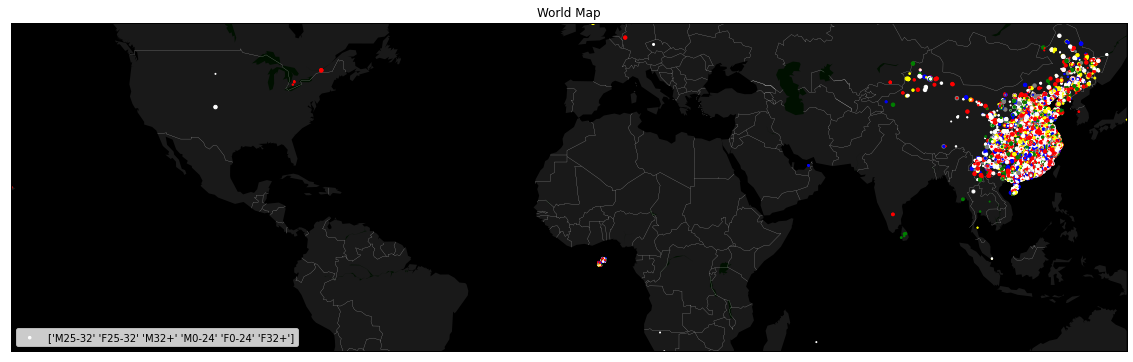

In [147]:
fig = plt.figure(figsize=(20, 20))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=df_event_data_1lacP_["latitude"].min(),  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=df_event_data_1lacP_["latitude"].max(), #latitude of upper right hand corner of the desired map domain
             llcrnrlon=df_event_data_1lacP_["longitude"].min(), #longitude of lower left hand corner of the desired map domain
             urcrnrlon=df_event_data_1lacP_["longitude"].max(), #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#001000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# M_ = df_event_data_1lacP_[df_event_data_1lacP_.gender == 'M']
# F_ = df_event_data_1lacP_[df_event_data_1lacP_.gender == 'F']

# Plot the data
mxy = m(df_event_data_1lacP_["longitude"].tolist(), df_event_data_1lacP_["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=[12 if x >10 else x for x in df_event_data_1lacP_['count']], 
          color = [color_dict[g] for g in df_event_data_1lacP_.groups], zorder=2, label = df_event_data_1lacP_.groups.unique())    # zorder for the points  

# mxy = m(F_["longitude"].tolist(), F_["latitude"].tolist())
# m.scatter(mxy[0], mxy[1], s=[12 if x >10 else x for x in F_['count']], 
#           c='green', zorder=2, label = 'Female')    # zorder for the points  
plt.legend()
plt.title("World Map")
plt.show()

# SubTask: Clustering

In [54]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from geopy.distance import great_circle
import time

In [55]:
df_event_data_feat = df_event_data_llc_with_Avg_TS_lag_med.select(col('latitude'),col('longitude')).toPandas()

df_event_data_feat.shape

df_event_data_feat.head()

LL_Feat = df_event_data_feat[['latitude','longitude']].drop_duplicates()

kms_per_rad = 6371.0088

def get_centroid(cluster):
  """calculate the centroid of a cluster of geographic coordinate points
  Args:
    cluster coordinates, nx2 array-like (array, list of lists, etc) 
    n is the number of points(latitude, longitude)in the cluster.
  Return:
    geometry centroid of the cluster
    
  """
  cluster_ary = np.asarray(cluster)
  centroid = cluster_ary.mean(axis = 0)
  return centroid

# testing get_centroid function
test_cluster= [[ 43.70487299, -79.57753802], 
               [ 43.71138367, -79.56524418],
               [ 43.72616079, -79.57319998],
               [ 43.73547907, -79.56258364],
               [ 43.72070325, -79.57202018],
               [ 43.73126031, -79.5598719 ]]
test_centroid = get_centroid(test_cluster)
print(test_centroid)

epss = range(1,21)
min_samples = range(0,21)

! pip3 install tqdm

from tqdm import tqdm

[ 43.72164335 -79.56840965]
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable


In [56]:
epss = range(1,21)
min_samples = range(0,21)

In [57]:
from tqdm import tqdm

In [189]:
silhouette_scores = {}
# Extract intersection coordinates (latitude, longitude)
coords = LL_Feat
for e in tqdm(epss):
    for ms in min_samples:
        epsilon = e/kms_per_rad

    

        start_time = time.time()
        try:
            dbsc = (DBSCAN(eps=epsilon, min_samples=ms, algorithm='ball_tree', metric='haversine')
                    .fit(np.radians(coords)))
            cluster_labels = dbsc.labels_
            silhouette_scores[metrics.silhouette_score(coords, cluster_labels)] = [e,ms]
        except ValueError:
            pass
        # get the number of clusters
#         num_clusters = len(set(dbsc.labels_))

100%|██████████| 20/20 [1:46:10<00:00, 318.54s/it]


In [54]:
# silhouette_scores[0.2025252669215222]

In [58]:
coords = LL_Feat

In [59]:
epsilon = 5/kms_per_rad

start_time = time.time()
dbsc = (DBSCAN(eps=epsilon, min_samples=2, algorithm='ball_tree', metric='haversine')
        .fit(np.radians(coords)))
cluster_labels = dbsc.labels_
print(metrics.silhouette_score(coords, cluster_labels))

0.20256814324682204


In [221]:
dll = df_event_data.select(col('device_id'),col('latitude'),col('longitude'))

In [222]:
dll_P = dll.toPandas()

In [60]:
len(Counter(cluster_labels))

2345

In [61]:
cluster_labels

array([  0,   1,   2, ..., 370, 797, 348])

In [ ]:
# print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(LL_Feat), num_clusters, 100*(1 - float(num_clusters) / len(LL_Feat)), time.time()-start_time))
print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(coords, cluster_labels)))

# turn the clusters into a pandas series,where each element is a cluster of points
dbsc_clusters = pd.Series([coords[cluster_labels==n] for n in range(num_clusters)])

In [154]:
print(Counter(cluster_labels))

Counter({-1: 6605, 45: 1143, 3: 635, 5: 635, 12: 617, 75: 460, 0: 387, 33: 377, 27: 365, 24: 307, 95: 265, 126: 250, 55: 234, 174: 204, 62: 192, 88: 188, 6: 181, 43: 177, 2: 167, 105: 165, 52: 163, 182: 159, 25: 156, 340: 154, 87: 153, 128: 131, 19: 122, 51: 119, 181: 116, 131: 114, 9: 113, 157: 113, 89: 106, 234: 99, 76: 96, 453: 95, 188: 94, 30: 92, 186: 92, 35: 80, 65: 80, 301: 76, 10: 74, 536: 74, 199: 67, 160: 66, 401: 66, 179: 63, 4: 57, 391: 56, 366: 55, 116: 54, 266: 54, 17: 52, 697: 52, 54: 51, 136: 51, 14: 50, 644: 50, 101: 49, 611: 49, 63: 48, 427: 47, 109: 46, 445: 46, 527: 46, 779: 45, 170: 44, 518: 44, 529: 44, 124: 43, 511: 43, 561: 43, 177: 42, 825: 42, 376: 41, 496: 41, 601: 41, 677: 41, 868: 41, 48: 40, 83: 40, 277: 40, 115: 39, 495: 39, 21: 38, 292: 38, 467: 38, 296: 37, 36: 36, 94: 36, 319: 36, 517: 36, 129: 35, 189: 35, 343: 35, 889: 35, 178: 34, 190: 34, 318: 34, 329: 34, 485: 33, 690: 33, 41: 32, 280: 32, 346: 32, 450: 32, 53: 31, 308: 31, 275: 30, 276: 30, 338: 

In [142]:
coords

,latitude,longitude
0,23.19,113.24
1,30.87,114.36
2,34.70,113.71
4,22.73,113.80
5,22.53,114.06
...,...,...
858922,35.41,110.44
858977,36.47,116.00
859081,37.51,116.32
859114,28.61,121.26


In [62]:
coords['Clusters_LL'] =  cluster_labels

In [63]:
coords['Key'] = coords.latitude.astype(str)+'_'+coords.longitude.astype(str)

In [91]:
import findspark

In [101]:
from pyspark.sql.functions import create_map,lit
from itertools import chain

In [98]:
dict_ = {}
for i,d in coords[['Key','Clusters_LL']].iterrows():
    dict_[d[0]] =d[1] 

In [102]:
mapping_expr = create_map([lit(x) for x in chain(*dict_.items())])

In [94]:
coors_df = spark.createDataFrame(coords)

In [95]:
coors_df.show(5)

Py4JJavaError: An error occurred while calling o923.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 60.0 failed 1 times, most recent failure: Lost task 0.0 in stage 60.0 (TID 3972, localhost, executor driver): java.io.IOException: Cannot run program "/home/ubuntu/spark-2.4.4-bin-hadoop2.7/python": error=13, Permission denied
	at java.lang.ProcessBuilder.start(ProcessBuilder.java:1048)
	at org.apache.spark.api.python.PythonWorkerFactory.startDaemon(PythonWorkerFactory.scala:197)
	at org.apache.spark.api.python.PythonWorkerFactory.createThroughDaemon(PythonWorkerFactory.scala:122)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:95)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:117)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:109)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.io.IOException: error=13, Permission denied
	at java.lang.UNIXProcess.forkAndExec(Native Method)
	at java.lang.UNIXProcess.<init>(UNIXProcess.java:247)
	at java.lang.ProcessImpl.start(ProcessImpl.java:134)
	at java.lang.ProcessBuilder.start(ProcessBuilder.java:1029)
	... 37 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1889)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1877)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1876)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1876)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2110)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2048)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:737)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:365)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:38)
	at org.apache.spark.sql.Dataset.org$apache$spark$sql$Dataset$$collectFromPlan(Dataset.scala:3389)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2550)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2550)
	at org.apache.spark.sql.Dataset$$anonfun$52.apply(Dataset.scala:3370)
	at org.apache.spark.sql.execution.SQLExecution$$anonfun$withNewExecutionId$1.apply(SQLExecution.scala:78)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:73)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3369)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2550)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2764)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:254)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:291)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.io.IOException: Cannot run program "/home/ubuntu/spark-2.4.4-bin-hadoop2.7/python": error=13, Permission denied
	at java.lang.ProcessBuilder.start(ProcessBuilder.java:1048)
	at org.apache.spark.api.python.PythonWorkerFactory.startDaemon(PythonWorkerFactory.scala:197)
	at org.apache.spark.api.python.PythonWorkerFactory.createThroughDaemon(PythonWorkerFactory.scala:122)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:95)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:117)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:109)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: java.io.IOException: error=13, Permission denied
	at java.lang.UNIXProcess.forkAndExec(Native Method)
	at java.lang.UNIXProcess.<init>(UNIXProcess.java:247)
	at java.lang.ProcessImpl.start(ProcessImpl.java:134)
	at java.lang.ProcessBuilder.start(ProcessBuilder.java:1029)
	... 37 more


In [64]:
train_test = pd.read_csv('train_test_split.csv')

In [65]:
train_test.head()

,device_id,gender,age,group,train_test_flag
0,-7548291590301750000,M,33,M32+,train
1,6943568600617760000,M,37,M32+,train
2,5441349705980020000,M,40,M32+,train
3,-5393876656119450000,M,33,M32+,train
4,4543988487649880000,M,53,M32+,train


In [63]:
len(train_test.device_id.unique())

74645

In [66]:
train_ = train_test[train_test['train_test_flag'] == 'train']['device_id']
test_ = train_test[train_test['train_test_flag'] == 'test']['device_id']

In [69]:
df_event_data_llc_with_Avg_TS_lag_med.select('event_id').distinct().count()

859293

In [67]:
df_event_data_llc_with_Avg_TS_lag_med.show(5)

+-------+-------+-------+--------------------+--------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+----+----+-----------------+-------------+--------------+------------+
|lat_med|lon_med|    eid|                 did|           device_id|gender|age|groups|event_id|         time_stamp|longitude|latitude|Month|Year|DayOfWeek|Week|Hour|     avg(Diff_TS)|prev_Latitude|prev_Longitude|Change_in_LL|
+-------+-------+-------+--------------------+--------------------+------+---+------+--------+-------------------+---------+--------+-----+----+---------+----+----+-----------------+-------------+--------------+------------+
|  23.19| 113.24|2728961|-9222956879900150000|-9222956879900150000|     M| 36|  M32+| 2728961|2016-05-07 14:22:50|   113.24|   23.19|    5|2016|        7|  18|  14|           677.55|        23.19|        113.24|        true|
|  30.87| 114.36| 340913|-9221026417907250000|-9221026417907250000|     F| 31|F25-32|  340913|2016-0

In [70]:
df_event_data_llc_with_Avg_TS_lag_med.count()

859293

In [66]:
df.printSchema()

root
 |-- event_id: integer (nullable = true)
 |-- app_id: long (nullable = true)
 |-- is_installed: integer (nullable = true)
 |-- is_active: integer (nullable = true)
 |-- label_id: integer (nullable = true)
 |-- category: string (nullable = true)



In [68]:
df_V1 = df_V1.withColumn('category',when(col('category').rlike("music|song|movie|show"),"entertainment")
                                     .when(col('category').rlike("sport"),"sports")
                                     .when(col('category').rlike("game|gam"),"game")
                                     .when(col('category').rlike("edu|study"),"education")
                                     .when(col('category').rlike("income|money|invest|loan|fund|broker"),"monetary")
                                     .when(col('category').rlike("health|medical"),"health")
                                     .when(col('category').rlike("library|book"),"books")
                                     .when(col('category').rlike("anim"),"animation")
                                     .when(col('category').rlike("comic"),"comics")
                                     .when(col('category').rlike("baby|kid|child"),"kids")
                                     .when(col('category').rlike("travel|tour|hotel|train"),"travel")
                                     .when(col('category').rlike("make|beauty"),"cosmetics")
                                     .when(col('category').rlike("bank"),"bank")
                                     .when(col('category').rlike("insur"),"insurance")
                                     .when(col('category').rlike("shop"),"shopping")
                                     .when(col('category').rlike("shares|equity|stock|future|option"),"market")
                                     .when(col('category').rlike("car"),"cars")
                                     .when(col('category').rlike("info"),"info")
                                     .when(col('category').rlike("airline"),"airlines")
                                     .when(col('category').rlike("art|culture|paint"),"art")
                                     .when(col('category').rlike("myth"),"myth")
                                     .when(col('category').rlike("basketball|rpg|warcraft|football|chess"),"game")
                                     .otherwise('others'))

df_V2 = df_V2.withColumn('category',when(col('category').rlike("music|song|movie|show"),"entertainment")
                                     .when(col('category').rlike("sport"),"sports")
                                     .when(col('category').rlike("game|gam"),"game")
                                     .when(col('category').rlike("edu|study"),"education")
                                     .when(col('category').rlike("income|money|invest|loan|fund|broker"),"monetary")
                                     .when(col('category').rlike("health|medical"),"health")
                                     .when(col('category').rlike("library|book"),"books")
                                     .when(col('category').rlike("anim"),"animation")
                                     .when(col('category').rlike("comic"),"comics")
                                     .when(col('category').rlike("baby|kid|child"),"kids")
                                     .when(col('category').rlike("travel|tour|hotel|train"),"travel")
                                     .when(col('category').rlike("make|beauty"),"cosmetics")
                                     .when(col('category').rlike("bank"),"bank")
                                     .when(col('category').rlike("insur"),"insurance")
                                     .when(col('category').rlike("shop"),"shopping")
                                     .when(col('category').rlike("shares|equity|stock|future|option"),"market")
                                     .when(col('category').rlike("car"),"cars")
                                     .when(col('category').rlike("info"),"info")
                                     .when(col('category').rlike("airline"),"airlines")
                                     .when(col('category').rlike("art|culture|paint"),"art")
                                     .when(col('category').rlike("myth"),"myth")
                                     .when(col('category').rlike("basketball|rpg|warcraft|football|chess"),"game")
                                     .otherwise('others'))

df = df.withColumn('category',when(col('category').rlike("music|song|movie|show"),"entertainment")
                                     .when(col('category').rlike("sport"),"sports")
                                     .when(col('category').rlike("game|gam"),"game")
                                     .when(col('category').rlike("edu|study"),"education")
                                     .when(col('category').rlike("income|money|invest|loan|fund|broker"),"monetary")
                                     .when(col('category').rlike("health|medical"),"health")
                                     .when(col('category').rlike("library|book"),"books")
                                     .when(col('category').rlike("anim"),"animation")
                                     .when(col('category').rlike("comic"),"comics")
                                     .when(col('category').rlike("baby|kid|child"),"kids")
                                     .when(col('category').rlike("travel|tour|hotel|train"),"travel")
                                     .when(col('category').rlike("make|beauty"),"cosmetics")
                                     .when(col('category').rlike("bank"),"bank")
                                     .when(col('category').rlike("insur"),"insurance")
                                     .when(col('category').rlike("shop"),"shopping")
                                     .when(col('category').rlike("shares|equity|stock|future|option"),"market")
                                     .when(col('category').rlike("car"),"cars")
                                     .when(col('category').rlike("info"),"info")
                                     .when(col('category').rlike("airline"),"airlines")
                                     .when(col('category').rlike("art|culture|paint"),"art")
                                     .when(col('category').rlike("myth"),"myth")
                                     .when(col('category').rlike("basketball|rpg|warcraft|football|chess"),"game")
                                     .otherwise('others'))

In [69]:
df.show(5)

+--------+--------------------+------------+---------+--------+--------+
|event_id|              app_id|is_installed|is_active|label_id|category|
+--------+--------------------+------------+---------+--------+--------+
| 1000000|-1051986413094956896|           1|        0|     787|  others|
| 1000000|-1234297064722937607|           1|        0|     405|  others|
| 1000000|-1234297064722937607|           1|        0|     737|monetary|
| 1000000|-1234297064722937607|           1|        0|     738|monetary|
| 1000000|-1562373526021293187|           1|        0|    1007|monetary|
+--------+--------------------+------------+---------+--------+--------+
only showing top 5 rows



In [70]:
df_V1.show(5)

+--------+--------------------+------------+---------+--------+--------+
|event_id|              app_id|is_installed|is_active|label_id|category|
+--------+--------------------+------------+---------+--------+--------+
| 1000000|-1051986413094956896|           1|        0|    1012|    bank|
| 1000000|-1051986413094956896|           1|        0|     405|  others|
| 1000000|-1051986413094956896|           1|        0|     777|  others|
| 1000000|-1051986413094956896|           1|        0|     782|monetary|
| 1000000|-1234297064722937607|           1|        0|     781|  others|
+--------+--------------------+------------+---------+--------+--------+
only showing top 5 rows



In [71]:
df_V2.show(5)

+--------+--------------------+------------+---------+--------+--------+
|event_id|              app_id|is_installed|is_active|label_id|category|
+--------+--------------------+------------+---------+--------+--------+
| 1000000|-1051986413094956896|           1|        0|     730|  others|
| 1000000|-1051986413094956896|           1|        0|     756|    bank|
| 1000000|-1051986413094956896|           1|        0|     761|  others|
| 1000000|-1234297064722937607|           1|        0|     730|  others|
| 1000000|-1234297064722937607|           1|        0|     774|  others|
+--------+--------------------+------------+---------+--------+--------+
only showing top 5 rows



In [72]:
df_G = df_V1.groupby(col('event_id')).pivot('category').sum('is_active')

df_G2 = df_V2.groupby(col('event_id')).pivot('category').sum('is_active')

df_G3 = df.groupby(col('event_id')).pivot('category').sum('is_active')

In [73]:
df_all = df_G.union(df_G2).union(df_G3)

In [74]:
df_all.show(5)

+--------+--------+---------+----+----+-----+----+------+---------+---------+-------------+----+------+----+---------+----+------+--------+----+------+--------+------+------+
|event_id|airlines|animation| art|bank|books|cars|comics|cosmetics|education|entertainment|game|health|info|insurance|kids|market|monetary|myth|others|shopping|sports|travel|
+--------+--------+---------+----+----+-----+----+------+---------+---------+-------------+----+------+----+---------+----+------+--------+----+------+--------+------+------+
|  100170|    null|     null|null|   1| null|null|  null|     null|     null|         null|null|  null|null|     null|null|  null|       4|null|    35|    null|  null|  null|
| 1012609|    null|     null|null|null| null|null|  null|     null|     null|         null|null|  null|null|     null|null|  null|    null|null|     5|    null|  null|  null|
| 1016546|    null|     null|null|null| null|null|  null|     null|     null|         null|null|  null|null|     null|null|  

In [75]:
df_all = df_all.fillna(0)

In [145]:
final_data_1 = df_event_data_llc_with_Avg_TS_lag_med.join(df_all,['event_id'],'left')

In [146]:
final_data_1 = final_data_1.drop('eid').drop('did')

In [85]:
final_data_1.columns

['event_id',
 'lat_med',
 'lon_med',
 'device_id',
 'gender',
 'age',
 'groups',
 'time_stamp',
 'longitude',
 'latitude',
 'Month',
 'Year',
 'DayOfWeek',
 'Week',
 'Hour',
 'avg(Diff_TS)',
 'prev_Latitude',
 'prev_Longitude',
 'Change_in_LL',
 'airlines',
 'animation',
 'art',
 'bank',
 'books',
 'cars',
 'comics',
 'cosmetics',
 'education',
 'entertainment',
 'game',
 'health',
 'info',
 'insurance',
 'kids',
 'market',
 'monetary',
 'myth',
 'others',
 'shopping',
 'sports',
 'travel']

In [147]:
final_data_1 = final_data_1.withColumn('Key',col('latitude').cast(StringType())+'_'+col('longitude').cast(StringType()))

In [148]:
final_data_1 = final_data_1.withColumn('LL_Cluster', mapping_expr[final_data_1['Key']])

In [107]:
final_data_1.show(5)

+--------+-------+-------+--------------------+------+---+------+-------------------+---------+--------+-----+----+---------+----+----+------------------+-------------+--------------+------------+--------+---------+----+----+-----+----+------+---------+---------+-------------+----+------+----+---------+----+------+--------+----+------+--------+------+------+----+----------+
|event_id|lat_med|lon_med|           device_id|gender|age|groups|         time_stamp|longitude|latitude|Month|Year|DayOfWeek|Week|Hour|      avg(Diff_TS)|prev_Latitude|prev_Longitude|Change_in_LL|airlines|animation| art|bank|books|cars|comics|cosmetics|education|entertainment|game|health|info|insurance|kids|market|monetary|myth|others|shopping|sports|travel| Key|LL_Cluster|
+--------+-------+-------+--------------------+------+---+------+-------------------+---------+--------+-----+----+---------+----+----+------------------+-------------+--------------+------------+--------+---------+----+----+-----+----+------+---

In [149]:
final_data_1 = final_data_1.fillna(0)

In [109]:
final_data_1.columns

['event_id',
 'lat_med',
 'lon_med',
 'device_id',
 'gender',
 'age',
 'groups',
 'time_stamp',
 'longitude',
 'latitude',
 'Month',
 'Year',
 'DayOfWeek',
 'Week',
 'Hour',
 'avg(Diff_TS)',
 'prev_Latitude',
 'prev_Longitude',
 'Change_in_LL',
 'airlines',
 'animation',
 'art',
 'bank',
 'books',
 'cars',
 'comics',
 'cosmetics',
 'education',
 'entertainment',
 'game',
 'health',
 'info',
 'insurance',
 'kids',
 'market',
 'monetary',
 'myth',
 'others',
 'shopping',
 'sports',
 'travel',
 'Key',
 'LL_Cluster']

In [153]:
final_data_1.printSchema()

root
 |-- event_id: integer (nullable = true)
 |-- lat_med: double (nullable = false)
 |-- lon_med: double (nullable = false)
 |-- device_id: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- groups: string (nullable = true)
 |-- time_stamp: timestamp (nullable = true)
 |-- longitude: double (nullable = false)
 |-- latitude: double (nullable = false)
 |-- Month: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Week: integer (nullable = true)
 |-- Hour: integer (nullable = true)
 |-- avg(Diff_TS): double (nullable = false)
 |-- prev_Latitude: double (nullable = false)
 |-- prev_Longitude: double (nullable = false)
 |-- Change_in_LL: integer (nullable = false)
 |-- airlines: long (nullable = true)
 |-- animation: long (nullable = true)
 |-- art: long (nullable = true)
 |-- bank: long (nullable = true)
 |-- books: long (nullable = true)
 |-- cars: long (nullable = true)
 |-- co

In [151]:
final_data_1 = final_data_1.withColumn('Change_in_LL',when(col('Change_in_LL') == True,1).otherwise(0))

In [154]:
final_data_1.printSchema()

root
 |-- event_id: integer (nullable = true)
 |-- lat_med: double (nullable = false)
 |-- lon_med: double (nullable = false)
 |-- device_id: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- groups: string (nullable = true)
 |-- time_stamp: timestamp (nullable = true)
 |-- longitude: double (nullable = false)
 |-- latitude: double (nullable = false)
 |-- Month: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Week: integer (nullable = true)
 |-- Hour: integer (nullable = true)
 |-- avg(Diff_TS): double (nullable = false)
 |-- prev_Latitude: double (nullable = false)
 |-- prev_Longitude: double (nullable = false)
 |-- Change_in_LL: integer (nullable = false)
 |-- airlines: long (nullable = true)
 |-- animation: long (nullable = true)
 |-- art: long (nullable = true)
 |-- bank: long (nullable = true)
 |-- books: long (nullable = true)
 |-- cars: long (nullable = true)
 |-- co

In [157]:
final_data_1_1 = final_data_1.groupby(col('device_id'),
                                     col('gender'),
                                     col('age'),
                                      col('avg(Diff_TS)'),
                                     col('LL_Cluster')).agg(                                     col('avg(Diff_TS)'),
                                                            sum('Change_in_LL'),
                                                            count('event_id'),
                                                            sum('airlines'),
                                                            sum('animation'),
                                                            sum('art'),
                                                            sum('bank'),
                                                            sum('books'),
                                                            sum('cars'),
                                                            sum('comics'),
                                                            sum('cosmetics'),
                                                            sum('education'),
                                                            sum('entertainment'),
                                                            sum('game'),
                                                            sum('health'),
                                                            sum('info'),
                                                            sum('insurance'),
                                                            sum('kids'),
                                                            sum('market'),
                                                            sum('monetary'),
                                                            sum('myth'),
                                                            sum('others'),
                                                            sum('shopping'),
                                                            sum('sports'),
                                                            sum('travel'))

In [ ]:
# df_G.columns

# categories = set(categories)

# categories_ = categories.copy()

# import re

# categories = [re.sub('[^a-zA-Z]',' ',c).strip() for c in categories_]
# categories = ['game' if c.find('game') > -1 else c for c in categories]
# categories = ['sports' if c.find('sport') > -1 else c for c in categories]
# categories = ['finance' if c.find('financ') > -1 else c for c in categories]
# categories = ['investment' if c.find('invest') > -1 else c for c in categories]
# categories = ['parental' if c.find('parent') > -1 else c for c in categories]
# categories = ['books' if c.find('books') > -1 else c for c in categories]
# categories = ['comic' if c.find('comic') > -1 else c for c in categories]
# categories = ['animation' if c.find('anime') > -1 or c.find('anim') > -1  else c for c in categories]
# categories = ['loan' if c.find('loan') > -1 else c for c in categories]
# categories = ['income' if c.find('income') > -1 else c for c in categories]
# categories = ['airlines' if c.find('airline') > -1 else c for c in categories]
# categories = ['mythology' if c.find('myth') > -1 else c for c in categories]
# categories = ['bank' if c.find('bank') > -1 else c for c in categories]
# categories = ['tourism' if c.find('tourism') > -1 else c for c in categories]
# categories = ['news' if c.find('news') > -1 else c for c in categories]
# categories = ['travel' if c.find('travel') > -1 else c for c in categories]
# categories = ['insurance' if c.find('insurance') > -1 else c for c in categories]
# categories = ['funds' if c.find('fund') > -1 else c for c in categories]
# categories = ['kids' if c.find('baby') > -1 or c.find('kid') > -1 else c for c in categories]
# categories = ['risk' if c.find('risk') > -1 else c for c in categories]
# categories = ['shop' if c.find('shop') > -1 else c for c in categories]
# categories = ['fitness' if c.find('exercise') > -1 else c for c in categories]
# categories = ['fitness' if c.find('fitness') > -1 else c for c in categories]
# categories = ['fashion' if c.find('fashion') > -1 else c for c in categories]
# categories = ['payment' if c.find('pay') > -1 else c for c in categories]
# categories = ['painting' if c.find('paint') > -1 else c for c in categories]
# categories = ['love' if c.find('love') > -1 else c for c in categories]
# categories = ['professional' if c.find('professional') > -1 else c for c in categories]
# categories = ['car' if c.find('car') > -1 else c for c in categories]
# categories = ['abroad' if c.find('abroad') > -1 else c for c in categories]
# categories = ['study' if c.find('study') > -1 else c for c in categories]
# categories = ['fight' if c.find('fight') > -1 else c for c in categories]
# categories = ['trendy' if c.find('trend') > -1 else c for c in categories]
# categories = ['business' if c.find('business') > -1 else c for c in categories]
# categories = ['office' if c.find('office') > -1 else c for c in categories]
# categories = ['health' if c.find('health') > -1 else c for c in categories]
# categories = ['language' if c.find('language') > -1 else c for c in categories]
# categories = ['kids' if c.find('babies') > -1 else c for c in categories]
# categories = ['family' if c.find('family') > -1 else c for c in categories]
# categories = ['family' if c.find('families') > -1 else c for c in categories]
# categories = ['game' if c.find('gaming') > -1 else c for c in categories]
# categories = ['hotel' if c.find('hotel') > -1 else c for c in categories]
# categories = ['food' if c.find('food') > -1 else c for c in categories]
# categories = ['food' if c.find('restau') > -1 else c for c in categories]
# categories = ['songs' if c.find('song') > -1 else c for c in categories]
# categories = ['songs' if c.find('music') > -1 else c for c in categories]
# categories = ['cosmetics' if (c.find('make') > -1 and c.find('up') > -1) or (c.find('cosmetic') > -1) else c for c in categories]


# len(Counter(categories))

# # categories = set(categories)

# # nlp=spacy.load('en_core_web_md',disable=['parser','ner'])

# # categories_LOL = []
# # for cat in categories:
# #     cat_toks = nlp(cat)
# #     temp = []
# #     for c in cat_toks:
# #         temp.append(c.lemma_)
# #     categories_LOL.append(temp)

# # categories_LOL

# # import gensim
# # import gensim.downloader as api
# # from gensim.models import doc2vec
 
# # # get dataset
# # dataset = api.load("text8")
# # data =[]
# # for w in dataset:
# #   data.append(w)
 
# # # To train the model we need a list of tagged documents
# # def tagged_document(list_of_ListOfWords):
# #   for x, ListOfWords in enumerate(list_of_ListOfWords):
# #     yield doc2vec.TaggedDocument(ListOfWords, [x])
   
# # # training data
# # data_train = list(tagged_document(data))
   
# # # print trained dataset
# # # print(data_train[:1])

# # # Initialize the model
# # d2v_model = doc2vec.Doc2Vec(vector_size = 40, min_count = 1, epochs = 30)
 
# # # build the vocabulary
# # d2v_model.build_vocab(data_train)
 
# # # Train Doc2Vec model
# # d2v_model.train(data_train, total_examples = d2v_model.corpus_count, epochs = d2v_model.epochs)

# #  # Analyzing the output
    
# # vectors = []
# # for l in  tqdm(categories_LOL):
# #     vectors.append(d2v_model.infer_vector(l))

# # vectors = np.array(vectors)

# # from sklearn.cluster import KMeans

# # kmM = KMeans(n_clusters=100,init='k-means++', n_init=100, max_iter=500, tol=0.0001, verbose=0, random_state=42, copy_x=True)

# # kmMCat = kmM.fit(vectors)
# # clusters = kmMCat.labels_

# # len(categories)

# # len(clusters)

# # metrics.silhouette_score(vectors, clusters)

# cat_df = pd.DataFrame()

# cat_df['Categories_'] = list(categories_)
# cat_df['Categories'] = list(categories)
# # cat_df['Clusters'] = clusters

# len(set(categories_))

# cat_dict = {}
# for ind,data in cat_df.iterrows():
#     if data[1] not in cat_dict:
#         cat_dict[data[1]] = [data[0]]
#     else:
#         cat_dict[data[1]].append(data[0])

# df_t_Pandas.fillna(0,inplace = True)
# df_t1_Pandas.fillna(0,inplace = True)
# df_t2_Pandas.fillna(0,inplace = True)

# 'game' in df_t_Pandas.columns

# for k,v in tqdm(cat_dict.items()):
#     df_t_Pandas[k+'_C'] = 0
#     df_t1_Pandas[k+'_C'] = 0
#     df_t2_Pandas[k+'_C'] = 0
#     for v_ in v:
#         if v_ in df_t_Pandas.columns:
# #             print('----',v_)
#             df_t_Pandas[k+'_C'] = df_t_Pandas[k+'_C'] + df_t_Pandas[v_]
#             df_t_Pandas.drop(v_,axis = 1,inplace = True)
#         if v_ in df_t1_Pandas.columns:
#             df_t1_Pandas[k+'_C'] = df_t1_Pandas[k+'_C'] + df_t1_Pandas[v_]
#             df_t1_Pandas.drop(v_,axis = 1,inplace = True)
#         if v_ in df_t2_Pandas.columns:
#             df_t2_Pandas[k+'_C'] = df_t2_Pandas[k+'_C'] + df_t2_Pandas[v_]
#             df_t2_Pandas.drop(v_,axis = 1,inplace = True)            

In [158]:
final_data_1_1.columns

['device_id',
 'gender',
 'age',
 'avg(Diff_TS)',
 'LL_Cluster',
 'avg(Diff_TS)',
 'sum(Change_in_LL)',
 'count(event_id)',
 'sum(airlines)',
 'sum(animation)',
 'sum(art)',
 'sum(bank)',
 'sum(books)',
 'sum(cars)',
 'sum(comics)',
 'sum(cosmetics)',
 'sum(education)',
 'sum(entertainment)',
 'sum(game)',
 'sum(health)',
 'sum(info)',
 'sum(insurance)',
 'sum(kids)',
 'sum(market)',
 'sum(monetary)',
 'sum(myth)',
 'sum(others)',
 'sum(shopping)',
 'sum(sports)',
 'sum(travel)']

In [159]:
final_data_1_1 = final_data_1_1.drop('gender').drop('age')

In [121]:
final_data_1_1.columns

['device_id',
 'DayOfWeek',
 'Hour',
 'avg(Diff_TS)',
 'Change_in_LL',
 'LL_Cluster',
 'count(event_id)',
 'sum(airlines)',
 'sum(animation)',
 'sum(art)',
 'sum(bank)',
 'sum(books)',
 'sum(cars)',
 'sum(comics)',
 'sum(cosmetics)',
 'sum(education)',
 'sum(entertainment)',
 'sum(game)',
 'sum(health)',
 'sum(info)',
 'sum(insurance)',
 'sum(kids)',
 'sum(market)',
 'sum(monetary)',
 'sum(myth)',
 'sum(others)',
 'sum(shopping)',
 'sum(sports)',
 'sum(travel)']

In [160]:
final_data = df_non_event_data.join(final_data_1_1,['device_id'],'left')

In [123]:
final_data.show(5)

+--------------------+------+---+------+-----------+------------+---------+----+-----------------+------------+----------+---------------+-------------+--------------+--------+---------+----------+---------+-----------+--------------+--------------+------------------+---------+-----------+---------+--------------+---------+-----------+-------------+---------+-----------+-------------+-----------+-----------+
|           device_id|gender|age|groups|phone_brand|device_model|DayOfWeek|Hour|     avg(Diff_TS)|Change_in_LL|LL_Cluster|count(event_id)|sum(airlines)|sum(animation)|sum(art)|sum(bank)|sum(books)|sum(cars)|sum(comics)|sum(cosmetics)|sum(education)|sum(entertainment)|sum(game)|sum(health)|sum(info)|sum(insurance)|sum(kids)|sum(market)|sum(monetary)|sum(myth)|sum(others)|sum(shopping)|sum(sports)|sum(travel)|
+--------------------+------+---+------+-----------+------------+---------+----+-----------------+------------+----------+---------------+-------------+--------------+--------+

In [137]:
final_data.count()

268952

In [169]:
final_data_PD = final_data.toPandas()

In [162]:
final_data_PD.head()

,device_id,gender,age,groups,phone_brand,device_model,avg(Diff_TS),LL_Cluster,avg(Diff_TS),sum(Change_in_LL),...,sum(info),sum(insurance),sum(kids),sum(market),sum(monetary),sum(myth),sum(others),sum(shopping),sum(sports),sum(travel)
0,-9193445811384420000,F,26,F25-32,samsung,Galaxy A7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-9156769850272230000,M,31,M25-32,Xiaomi,MI 2S,99.244444,0.0,99.244444,44.0,...,0.0,0.0,0.0,0.0,8.0,0.0,56.0,0.0,0.0,0.0
2,-9115419745209610000,F,19,F0-24,Huawei,è£è€€3C,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-9101962973644730000,F,31,F25-32,samsung,Galaxy A7,57.252778,0.0,57.252778,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,240.0,0.0,0.0,0.0
4,-9072332457196160000,F,33,F32+,samsung,Galaxy Note 3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
final_data_PD.shape

(74646, 33)

In [164]:
train_test.shape

(74645, 5)

In [179]:
train_test.head()

,device_id,gender,age,group,train_test_flag
0,-7548291590301750000,M,33,M32+,train
1,6943568600617760000,M,37,M32+,train
2,5441349705980020000,M,40,M32+,train
3,-5393876656119450000,M,33,M32+,train
4,4543988487649880000,M,53,M32+,train


In [177]:
final_data_PD_ = final_data_PD[~(final_data_PD.index == 6737)]

In [178]:
final_data_PD_.shape

(74645, 33)

In [180]:
final_data_PD__tt = final_data_PD_.merge(train_test[['device_id','train_test_flag']], left_on = 'device_id',right_on = 'device_id')

In [181]:
final_data_PD__tt.shape

(74645, 34)

In [183]:
final_data_PD__tt.to_excel('train_test_dataset.xlsx')

In [186]:
final_data_PD__tt.fillna(0,inplace = True)

In [187]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [191]:
import re

In [193]:
final_data_PD__tt['groups'] = final_data_PD__tt['groups'].apply(lambda x : re.sub('[a-zA-z]','',x))

In [195]:
final_data_PD__tt.sort_values('train_test_flag',inplace = True)

In [203]:
final_data_PD__tt.head()

,device_id,gender,age,groups,phone_brand,device_model,avg(Diff_TS),LL_Cluster,avg(Diff_TS),sum(Change_in_LL),...,sum(myth),sum(others),sum(shopping),sum(sports),sum(travel),train_test_flag,genderLabel,groupsLabel,device_modelLabel,phone_brandLabel
20914,8866025070059070000,M,26,25-32,samsung,Galaxy Note 3,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,test,1,1,496,86
15330,7868021447680650000,M,27,25-32,samsung,Galaxy Note 3,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,test,1,1,496,86
62597,7234180210114850000,M,35,32+,Meizu,menote1 2,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,test,1,2,1308,21
32423,-9090242314887240000,M,29,25-32,samsung,Galaxy Note 2,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,test,1,1,495,86
32424,-9086090884397990000,M,30,25-32,OPPO,R7s,412.316667,0.0,412.316667,77.0,...,0.0,820.0,0.0,0.0,0.0,test,1,1,838,24


In [217]:
final_data_PD__tt.LL_Cluster.unique()

array([0.])

In [224]:
coords.head()

,latitude,longitude,Clusters_LL,Key
0,23.19,113.24,0,23.19_113.24
1,30.87,114.36,1,30.87_114.36
2,34.70,113.71,2,34.7_113.71
4,22.73,113.80,0,22.73_113.8
5,22.53,114.06,0,22.53_114.06


In [225]:
dll_P['Key'] = dll_P.latitude.astype(str)+'_'+dll_P.longitude.astype(str)

In [227]:
dll_P = dll_P.merge(coords[['Key','Clusters_LL']],left_on = 'Key',right_on = 'Key')

In [228]:
dll_P.head()

,device_id,latitude,longitude,Key,Clusters_LL
0,-1001337759327040000,30.29,120.11,30.29_120.11,70
1,-1001337759327040000,30.29,120.11,30.29_120.11,70
2,-1001337759327040000,30.29,120.11,30.29_120.11,70
3,-1001337759327040000,30.29,120.11,30.29_120.11,70
4,-3388525784534110000,30.29,120.11,30.29_120.11,70


In [248]:
final_data_PD__tt_ = final_data_PD__tt.merge(dll_P[['device_id','Clusters_LL']].drop_duplicates(),
                                             how = 'left',
                                             left_on = 'device_id',
                                            right_on = 'device_id')

In [251]:
final_data_PD__tt.shape

(74645, 39)

In [258]:
final_data_PD__tt_.fillna(-2,inplace = True)

In [345]:
final_data_PD__tt_S1 = final_data_PD__tt_[final_data_PD__tt_.Clusters_LL != -2]
final_data_PD__tt_S2 = final_data_PD__tt_[final_data_PD__tt_.Clusters_LL == -2]

In [346]:
final_data_PD__tt_g = final_data_PD__tt_S1.pivot_table(index = 'device_id', columns = 'Clusters_LL', values = 'gender',aggfunc = 'count')

final_data_PD__tt_g = final_data_PD__tt_g.fillna(0).reset_index()

final_data_PD__tt_g = pd.DataFrame(final_data_PD__tt_S1['device_id']).merge(final_data_PD__tt_g.drop_duplicates(),how = 'left',left_on = 'device_id',right_on = 'device_id')

final_data_PD__tt_g.iloc[-10:]

In [349]:
final_data_PD__tt_g.shape

(16307, 2346)

In [350]:
final_data_PD__tt_S1.shape

(16307, 40)

In [351]:
labelE = LabelEncoder()
final_data_PD__tt_S1['genderLabel'] = labelE.fit_transform(final_data_PD__tt_S1.gender)
final_data_PD__tt_S1['groupsLabel'] = labelE.fit_transform(final_data_PD__tt_S1.groups)
final_data_PD__tt_S1['device_modelLabel'] = labelE.fit_transform(final_data_PD__tt_S1.device_model)
final_data_PD__tt_S1['phone_brandLabel'] = labelE.fit_transform(final_data_PD__tt_S1.phone_brand)

ohe = OneHotEncoder()
device_modelE_S1 = ohe.fit_transform(np.array(final_data_PD__tt_S1.device_modelLabel).reshape(-1,1))
phone_brandE_S1 = ohe.fit_transform(np.array(final_data_PD__tt_S1.phone_brandLabel).reshape(-1,1))

In [357]:
from scipy.sparse import csr_matrix,hstack

In [358]:
LL_ClusterE = csr_matrix(np.array(final_data_PD__tt_g.iloc[:,1:]))

In [359]:
LL_ClusterE.shape

(16307, 2345)

In [360]:
numerics = np.array(final_data_PD__tt_S1[['avg(Diff_TS)', 'sum(Change_in_LL)',
       'count(event_id)', 'sum(airlines)', 'sum(animation)', 'sum(art)',
       'sum(bank)', 'sum(books)', 'sum(cars)', 'sum(comics)', 'sum(cosmetics)',
       'sum(education)', 'sum(entertainment)', 'sum(game)', 'sum(health)',
       'sum(info)', 'sum(insurance)', 'sum(kids)', 'sum(market)',
       'sum(monetary)', 'sum(myth)', 'sum(others)', 'sum(shopping)',
       'sum(sports)', 'sum(travel)']])

In [361]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
numerics_Scaled = mms.fit_transform(numerics)

In [362]:
numerics_Scaled_CSR = csr_matrix(numerics_Scaled)

In [363]:
features_S1 = hstack([LL_ClusterE,device_modelE_S1,phone_brandE_S1,numerics_Scaled_CSR])

In [364]:
features_S1.shape

(16307, 3008)

In [366]:
final_data_PD__tt_S2['genderLabel'] = labelE.fit_transform(final_data_PD__tt_S2.gender)
final_data_PD__tt_S2['groupsLabel'] = labelE.fit_transform(final_data_PD__tt_S2.groups)
final_data_PD__tt_S2['device_modelLabel'] = labelE.fit_transform(final_data_PD__tt_S2.device_model)
final_data_PD__tt_S2['phone_brandLabel'] = labelE.fit_transform(final_data_PD__tt_S2.phone_brand)

device_modelE_S2 = ohe.fit_transform(np.array(final_data_PD__tt_S2.device_modelLabel).reshape(-1,1))
phone_brandE_S2 = ohe.fit_transform(np.array(final_data_PD__tt_S2.phone_brandLabel).reshape(-1,1))

In [371]:
features_S2 = hstack([device_modelE_S2,phone_brandE_S2])

features_S2.shape

(62665, 1516)

In [373]:
final_data_PD__tt_S1.columns

Index(['device_id', 'gender', 'age', 'groups', 'phone_brand', 'device_model',
       'avg(Diff_TS)', 'LL_Cluster', 'avg(Diff_TS)', 'sum(Change_in_LL)',
       'count(event_id)', 'sum(airlines)', 'sum(animation)', 'sum(art)',
       'sum(bank)', 'sum(books)', 'sum(cars)', 'sum(comics)', 'sum(cosmetics)',
       'sum(education)', 'sum(entertainment)', 'sum(game)', 'sum(health)',
       'sum(info)', 'sum(insurance)', 'sum(kids)', 'sum(market)',
       'sum(monetary)', 'sum(myth)', 'sum(others)', 'sum(shopping)',
       'sum(sports)', 'sum(travel)', 'train_test_flag', 'genderLabel',
       'groupsLabel', 'device_modelLabel', 'phone_brandLabel',
       'LL_ClusterLabel', 'Clusters_LL'],
      dtype='object')

# Model

In [380]:
# Scenario 1

train_S1 = features_S1.A[len(final_data_PD__tt_S1[final_data_PD__tt_S1.train_test_flag == 'test']):,:]
test_S1 = features_S1.A[:len(final_data_PD__tt_S1[final_data_PD__tt_S1.train_test_flag == 'test']),:]

In [385]:
train_S1_Y = final_data_PD__tt_S1[final_data_PD__tt_S1.train_test_flag == 'train'].genderLabel
test_S1_Y = final_data_PD__tt_S1[final_data_PD__tt_S1.train_test_flag == 'test'].genderLabel

In [384]:
len(final_data_PD__tt_S1) == train_S1.shape[0] + test_S1.shape[0]

True

In [ ]:
# Age prediction Model

In [414]:
# Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [410]:
log_reg = LogisticRegression(penalty = 'l2')

In [411]:
lr_M = log_reg.fit(train_S1,train_S1_Y)

In [412]:
p_hat_S1_lr = lr_M.predict(test_S1)

In [416]:
print(classification_report(test_S1_Y,p_hat_S1_lr))

              precision    recall  f1-score   support

           0       0.39      0.12      0.18      1115
           1       0.74      0.93      0.83      3023

    accuracy                           0.71      4138
   macro avg       0.56      0.52      0.50      4138
weighted avg       0.65      0.71      0.65      4138



In [417]:
print(confusion_matrix(test_S1_Y,p_hat_S1_lr))

[[ 132  983]
 [ 210 2813]]


In [ ]:
# Random Forest Classifier

from sklearn.prepro

In [ ]:
# XGBoost

In [ ]:
# Stacking